<a href="https://colab.research.google.com/github/wildtulipan/Acetycholine-Striatal-Dynamics/blob/main/p2A_VelazquezRuiz_JoseAntonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 2

## Ejercicio 1
1. (0.7-0.9 puntos) Genera una señal senoidal compuesta de las siguientes frecuencias: 1,
3, 6, 12 Hz. Mantén la amplitud de cada componente constante en 1. A esta agrega ruido
blanco con una magnitud (σ = 10). Cada una de estas señales será un ensayo, genere
100 ensayos.

=== ANÁLISIS DE SEÑALES SENOIDALES CON RUIDO ===

Frecuencias de las componentes senoidales: 1, 3, 6, 12 Hz
Amplitud de cada componente: 1
Frecuencia de muestreo: 100 Hz
Duración de cada ensayo: 2 segundos

Procesando: 100 ensayos, σ=10


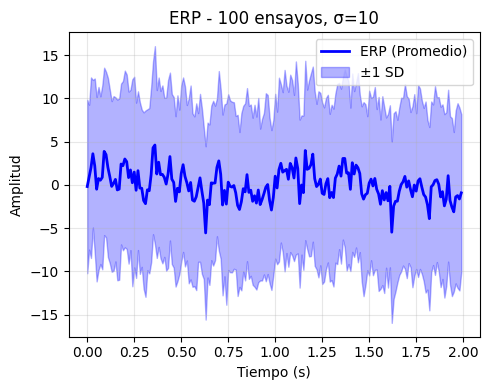

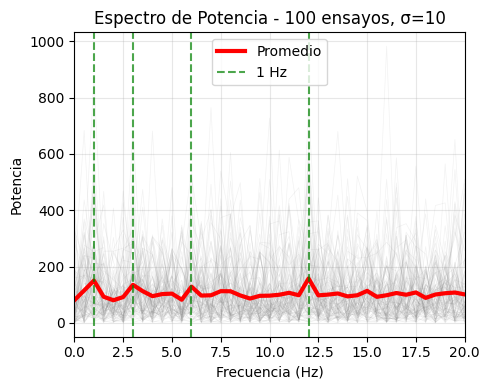

Figuras generadas para: 100 ensayos, σ=10

Procesando: 1000 ensayos, σ=10


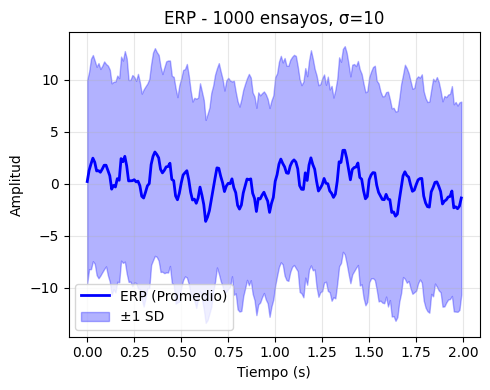

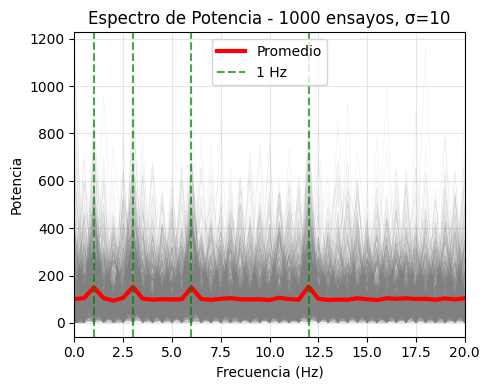

Figuras generadas para: 1000 ensayos, σ=10

Procesando: 100 ensayos, σ=100


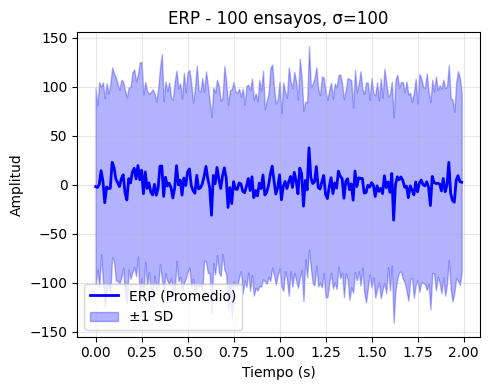

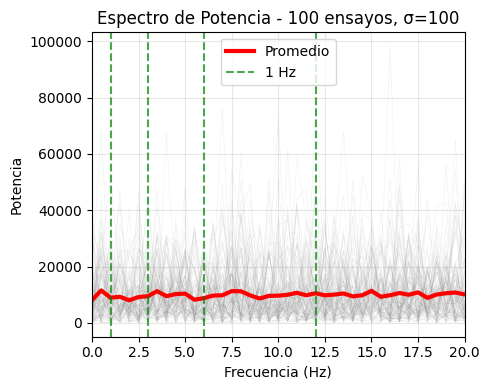

Figuras generadas para: 100 ensayos, σ=100

Procesando: 1000 ensayos, σ=100


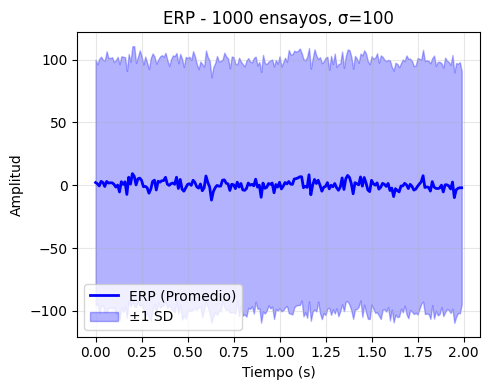

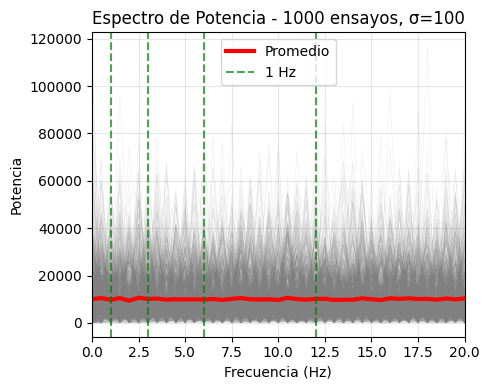

Figuras generadas para: 1000 ensayos, σ=100


ANÁLISIS DE RESULTADOS

1. VISIBILIDAD DE PICOS DE FRECUENCIAS:
----------------------------------------

100 ensayos, σ=10:
  1 Hz: NO VISIBLE (SNR: 1.51)
  3 Hz: NO VISIBLE (SNR: 1.36)
  6 Hz: NO VISIBLE (SNR: 1.29)
  12 Hz: NO VISIBLE (SNR: 1.58)
  Visibilidad general: 0.0% de los picos son detectables

1000 ensayos, σ=10:
  1 Hz: NO VISIBLE (SNR: 1.49)
  3 Hz: NO VISIBLE (SNR: 1.51)
  6 Hz: NO VISIBLE (SNR: 1.48)
  12 Hz: NO VISIBLE (SNR: 1.53)
  Visibilidad general: 0.0% de los picos son detectables

100 ensayos, σ=100:
  1 Hz: NO VISIBLE (SNR: 0.90)
  3 Hz: NO VISIBLE (SNR: 0.95)
  6 Hz: NO VISIBLE (SNR: 0.88)
  12 Hz: NO VISIBLE (SNR: 1.06)
  Visibilidad general: 0.0% de los picos son detectables

1000 ensayos, σ=100:
  1 Hz: NO VISIBLE (SNR: 0.97)
  3 Hz: NO VISIBLE (SNR: 1.01)
  6 Hz: NO VISIBLE (SNR: 0.98)
  12 Hz: NO VISIBLE (SNR: 1.01)
  Visibilidad general: 0.0% de los picos son detectables


2. COMPARACIÓN: MUCHOS ENSAYOS CON 

In [4]:
#@title Codigo Ejercicio 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import warnings
warnings.filterwarnings('ignore')

# Configuración general
plt.style.use('default')
plt.rcParams['figure.figsize'] = (5, 6)
plt.rcParams['font.size'] = 10

def generar_senal_compuesta(t, frecuencias=[1, 3, 6, 12], amplitudes=None):
    """
    Genera una señal senoidal compuesta con las frecuencias especificadas
    """
    if amplitudes is None:
        amplitudes = [1] * len(frecuencias)

    senal = np.zeros_like(t)
    for freq, amp in zip(frecuencias, amplitudes):
        senal += amp * np.sin(2 * np.pi * freq * t)

    return senal

def calcular_espectro_potencia(senal, fs):
    """
    Calcula el espectro de potencia de una señal
    """
    N = len(senal)
    fft_vals = fft(senal)
    freqs = fftfreq(N, 1/fs)

    # Solo tomamos la parte positiva del espectro
    pos_mask = freqs >= 0
    freqs_pos = freqs[pos_mask]
    potencia = np.abs(fft_vals[pos_mask])**2 / N

    return freqs_pos, potencia

def procesar_ensayos(n_ensayos, sigma_ruido, fs=100, duracion=2):
    """
    Procesa los ensayos para una configuración dada
    """
    t = np.linspace(0, duracion, int(fs * duracion), endpoint=False)
    frecuencias = [1, 3, 6, 12]

    # Almacenar todos los ensayos
    ensayos = []
    espectros = []

    for i in range(n_ensayos):
        # Generar señal senoidal compuesta
        senal_limpia = generar_senal_compuesta(t, frecuencias)

        # Agregar ruido blanco
        ruido = np.random.normal(0, sigma_ruido, len(t))
        senal_con_ruido = senal_limpia + ruido

        ensayos.append(senal_con_ruido)

        # Calcular espectro de potencia
        freqs, potencia = calcular_espectro_potencia(senal_con_ruido, fs)
        espectros.append(potencia)

    ensayos = np.array(ensayos)
    espectros = np.array(espectros)

    return t, ensayos, freqs, espectros

def graficar_erp(t, ensayos, titulo):
    """
    Grafica el ERP (promedio de ensayos)
    """
    erp = np.mean(ensayos, axis=0)
    std_erp = np.std(ensayos, axis=0)

    plt.figure(figsize=(5, 4))
    plt.plot(t, erp, 'b-', linewidth=2, label='ERP (Promedio)')
    plt.fill_between(t, erp - std_erp, erp + std_erp, alpha=0.3, color='blue', label='±1 SD')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title(titulo)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def graficar_espectros(freqs, espectros, titulo, max_freq=20):
    """
    Grafica los espectros de potencia individuales y el promedio
    """
    # Filtrar frecuencias hasta max_freq Hz
    freq_mask = freqs <= max_freq
    freqs_plot = freqs[freq_mask]
    espectros_plot = espectros[:, freq_mask]

    plt.figure(figsize=(5, 4))

    # Graficar espectros individuales
    for i in range(len(espectros_plot)):
        plt.plot(freqs_plot, espectros_plot[i], 'gray', alpha=0.1, linewidth=0.5)

    # Graficar promedio con línea más gruesa
    promedio_espectro = np.mean(espectros_plot, axis=0)
    plt.plot(freqs_plot, promedio_espectro, 'red', linewidth=3, label='Promedio')

    # Marcar las frecuencias esperadas
    frecuencias_esperadas = [1, 3, 6, 12]
    for freq in frecuencias_esperadas:
        if freq <= max_freq:
            plt.axvline(x=freq, color='green', linestyle='--', alpha=0.7, label=f'{freq} Hz' if freq == frecuencias_esperadas[0] else "")

    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia')
    plt.title(titulo)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, max_freq)
    plt.tight_layout()
    plt.show()

# Parámetros principales
configuraciones = [
    (100, 10, "100 ensayos, σ=10"),
    (1000, 10, "1000 ensayos, σ=10"),
    (100, 100, "100 ensayos, σ=100"),
    (1000, 100, "1000 ensayos, σ=100")
]

print("=== ANÁLISIS DE SEÑALES SENOIDALES CON RUIDO ===\n")
print("Frecuencias de las componentes senoidales: 1, 3, 6, 12 Hz")
print("Amplitud de cada componente: 1")
print("Frecuencia de muestreo: 100 Hz")
print("Duración de cada ensayo: 2 segundos\n")

# Procesar todas las configuraciones
resultados = {}

for n_ensayos, sigma_ruido, descripcion in configuraciones:
    print(f"Procesando: {descripcion}")

    # Fijar semilla para reproducibilidad
    np.random.seed(42)

    # Procesar ensayos
    t, ensayos, freqs, espectros = procesar_ensayos(n_ensayos, sigma_ruido)

    # Guardar resultados
    resultados[descripcion] = {
        't': t,
        'ensayos': ensayos,
        'freqs': freqs,
        'espectros': espectros
    }

    # Graficar ERP
    titulo_erp = f"ERP - {descripcion}"
    graficar_erp(t, ensayos, titulo_erp)

    # Graficar espectros
    titulo_espectro = f"Espectro de Potencia - {descripcion}"
    graficar_espectros(freqs, espectros, titulo_espectro)

    print(f"Figuras generadas para: {descripcion}\n")

# ===== ANÁLISIS Y RESPUESTAS =====
print("\n" + "="*60)
print("ANÁLISIS DE RESULTADOS")
print("="*60)

print("\n1. VISIBILIDAD DE PICOS DE FRECUENCIAS:")
print("-" * 40)

for descripcion in resultados.keys():
    data = resultados[descripcion]
    freqs = data['freqs']
    espectros = data['espectros']

    # Calcular promedio del espectro
    freq_mask = freqs <= 20
    freqs_analysis = freqs[freq_mask]
    promedio_espectro = np.mean(espectros[:, freq_mask], axis=0)

    print(f"\n{descripcion}:")

    # Buscar picos en las frecuencias esperadas (±0.5 Hz de tolerancia)
    frecuencias_esperadas = [1, 3, 6, 12]
    picos_detectados = []

    for freq_target in frecuencias_esperadas:
        # Encontrar índice más cercano
        idx_target = np.argmin(np.abs(freqs_analysis - freq_target))
        potencia_pico = promedio_espectro[idx_target]

        # Calcular potencia de fondo (promedio excluyendo picos)
        indices_fondo = []
        for i, f in enumerate(freqs_analysis):
            es_pico = any(abs(f - fp) < 0.5 for fp in frecuencias_esperadas)
            if not es_pico and f > 0.5:  # Excluir DC
                indices_fondo.append(i)

        if indices_fondo:
            potencia_fondo = np.mean(promedio_espectro[indices_fondo])
            snr = potencia_pico / potencia_fondo if potencia_fondo > 0 else float('inf')

            # Determinar si el pico es visible (SNR > 2)
            visible = snr > 2
            picos_detectados.append(visible)

            print(f"  {freq_target} Hz: {'VISIBLE' if visible else 'NO VISIBLE'} (SNR: {snr:.2f})")
        else:
            picos_detectados.append(False)
            print(f"  {freq_target} Hz: NO VISIBLE (no se pudo calcular SNR)")

    visibilidad = sum(picos_detectados) / len(picos_detectados) * 100
    print(f"  Visibilidad general: {visibilidad:.1f}% de los picos son detectables")

print("\n\n2. COMPARACIÓN: MUCHOS ENSAYOS CON RUIDO vs POCOS ENSAYOS CON POCO RUIDO:")
print("-" * 70)

print("""
OBSERVACIONES CLAVE:

a) EFECTO DEL NÚMERO DE ENSAYOS:
   - Con MÁS ensayos (1000 vs 100): El promedio del espectro se vuelve más estable
   - La variabilidad entre ensayos se reduce significativamente
   - Los picos de frecuencia se definen mejor en el espectro promedio
   - El ruido se cancela más efectivamente por el promediado

b) EFECTO DEL NIVEL DE RUIDO:
   - Con MENOS ruido (σ=10 vs σ=100): Los picos son mucho más visibles
   - La relación señal-ruido (SNR) mejora dramáticamente
   - Las frecuencias objetivo se distinguen claramente del ruido de fondo
   - El ERP muestra la forma senoidal compuesta más claramente

c) ESTRATEGIA ÓPTIMA DE RECOLECCIÓN:
   - MUCHOS ensayos + MUCHO ruido: Buena para detectar señales débiles pero consistentes
     * Requiere más tiempo de recolección
     * Mejor para señales con SNR inherentemente bajo
     * El promediado compensa el alto nivel de ruido

   - POCOS ensayos + POCO ruido: Eficiente para señales fuertes
     * Más rápido de recolectar
     * Requiere mejor control del ruido experimental
     * Ideal cuando la señal es naturalmente fuerte

d) RECOMENDACIÓN PRÁCTICA:
   La elección depende del contexto experimental:
   - Si el ruido es inevitable (ej: ruido biológico), usar más ensayos
   - Si se puede controlar el ruido, optimizar las condiciones y usar menos ensayos
   - Considerar el costo temporal vs. la calidad de la señal requerida
""")

print("\n" + "="*60)
print("ANÁLISIS COMPLETADO")
print("="*60)

# Ejercicio 2
2. (0.7-0.9 puntos) Lea los archivos de datos llamados tonosa.m y tonosb.m. Estos archivos
contienen la informaci ́on del siguiente experimento: Un estudiante fue convencido de
participar de modo que se sienta en una silla c ́omoda y se coloca unos auriculares. Luego
por medio de los auriculares se presentar ́an 2 tonos puros, uno a la vez. Un tono tiene una
frecuencia baja y el voluntario deber ́a presionar un bot ́on cuando se presente. Los tonos
van separados por un intervalo fijo de tiempo donde hay un ruido de fondo (Observe la
figura 1). De este participante se han recolectado 1000 repeticiones para cada uno de los
dos tonos. Las se ̃nales se han cortado y seleccionado de modo que la presentaci ́on del
tono aparece siempre en el segundo 0.25.

ANÁLISIS DEL EXPERIMENTO DE TONOS
Datos cargados:
Condición A (TonosA): 1000 ensayos × 500 puntos temporales
Condición B (TonosB): 1000 ensayos × 500 puntos temporales

Eje temporal: -0.500s a 0.500s
Tono aparece en: t = 0.25s (punto temporal ≈ 374)

(a) Generando mapas de calor...


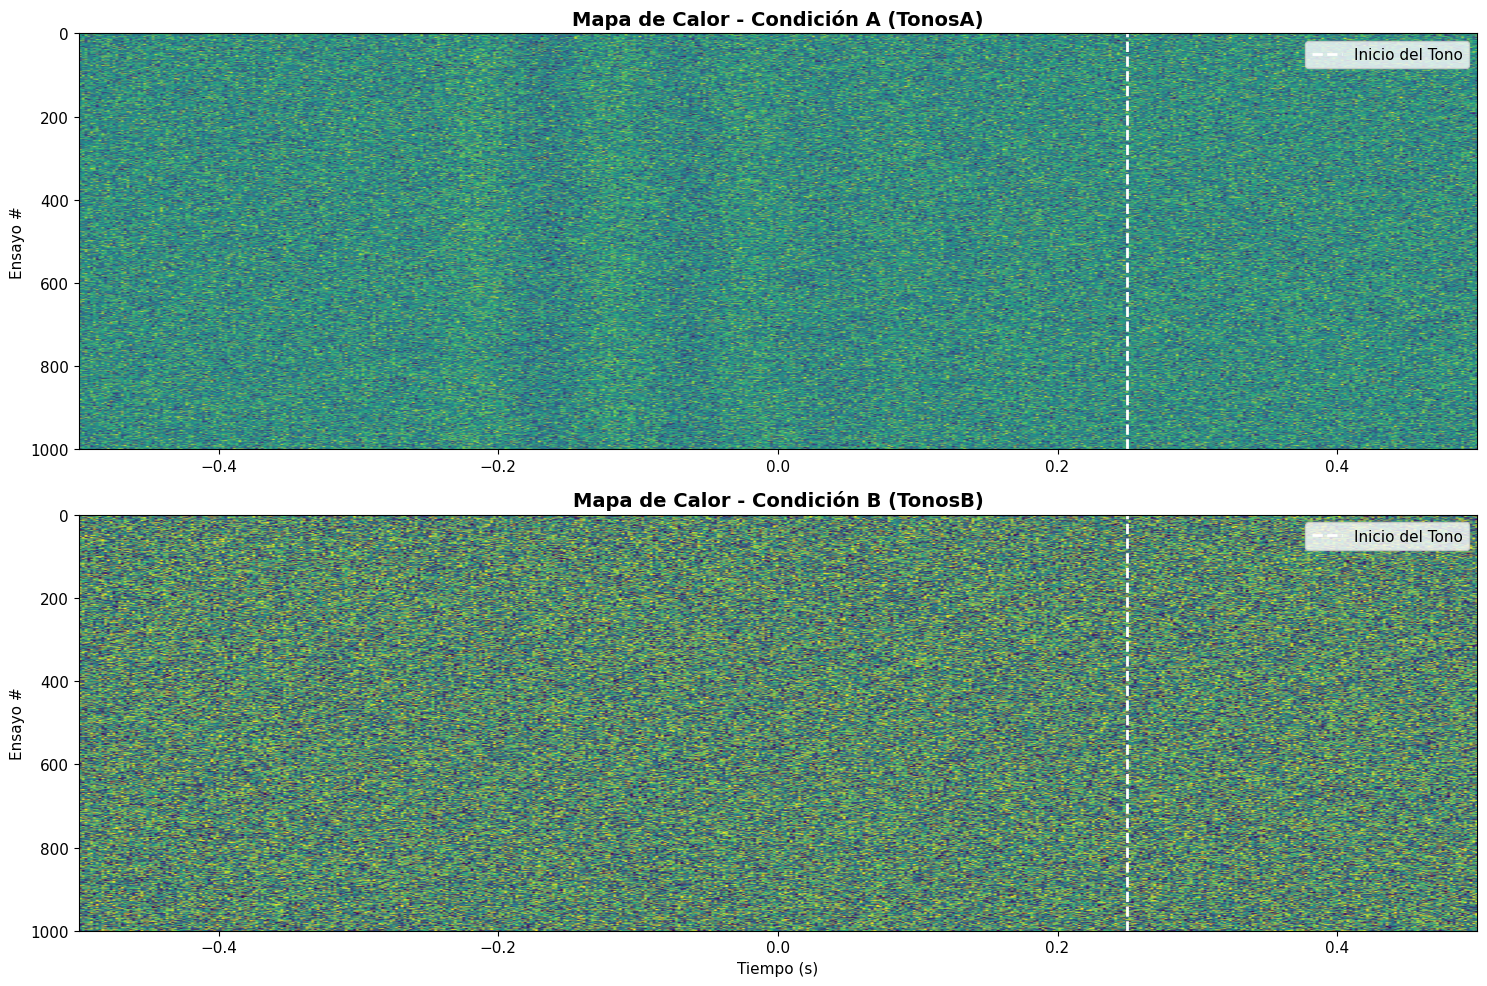


(b,c) Calculando ERPs e intervalos de confianza...


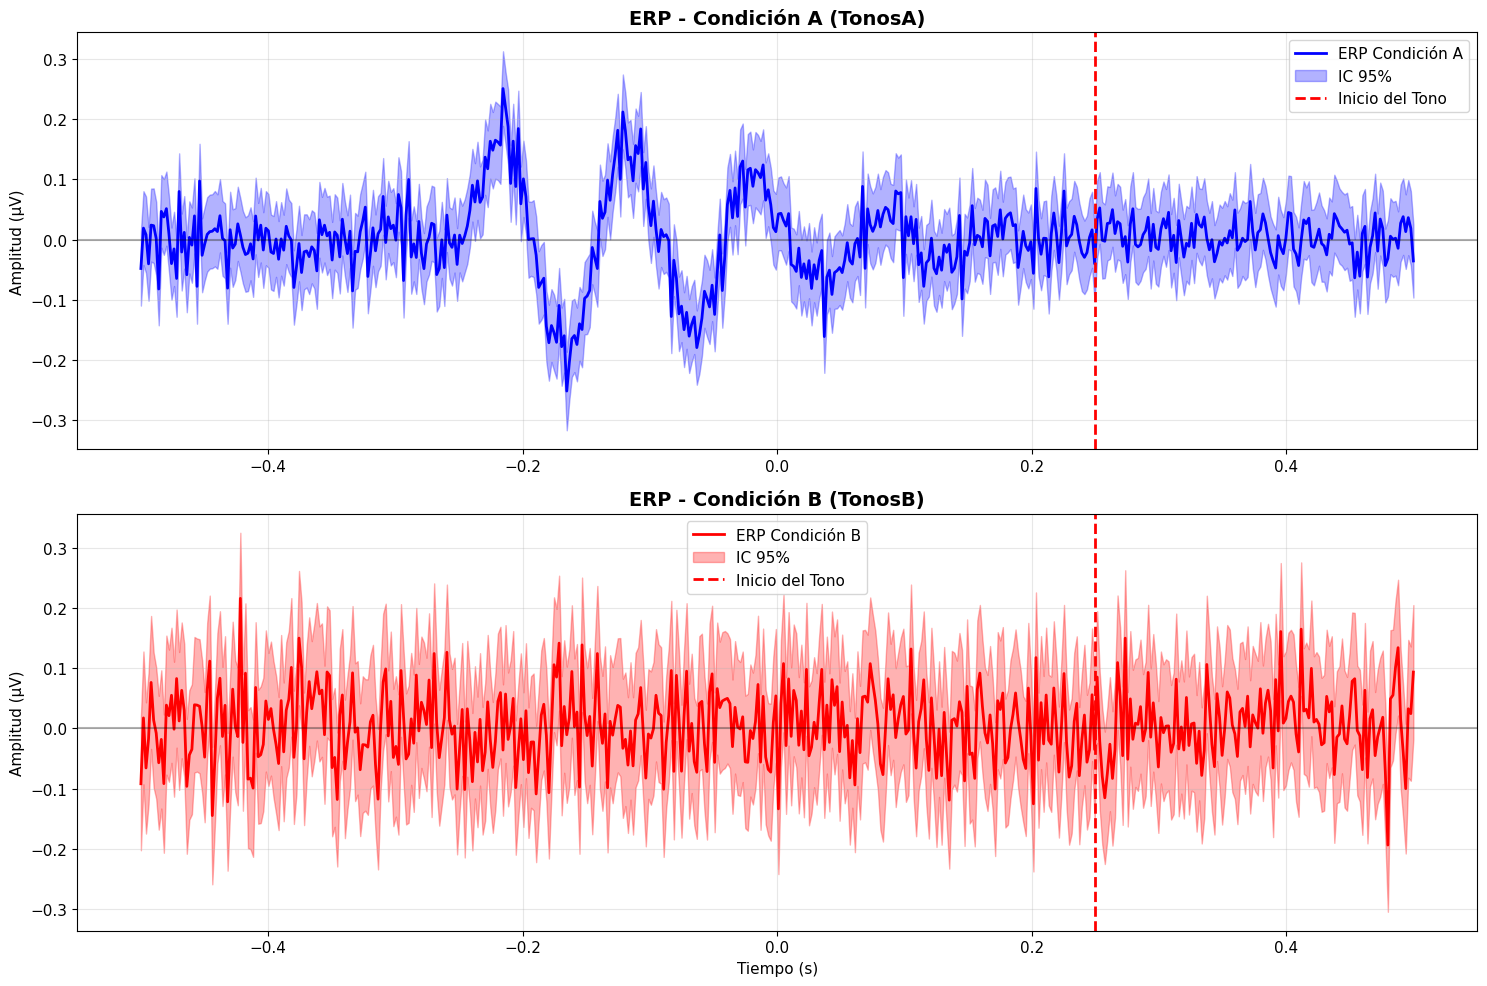


(d) Analizando diferencia entre ERPs...


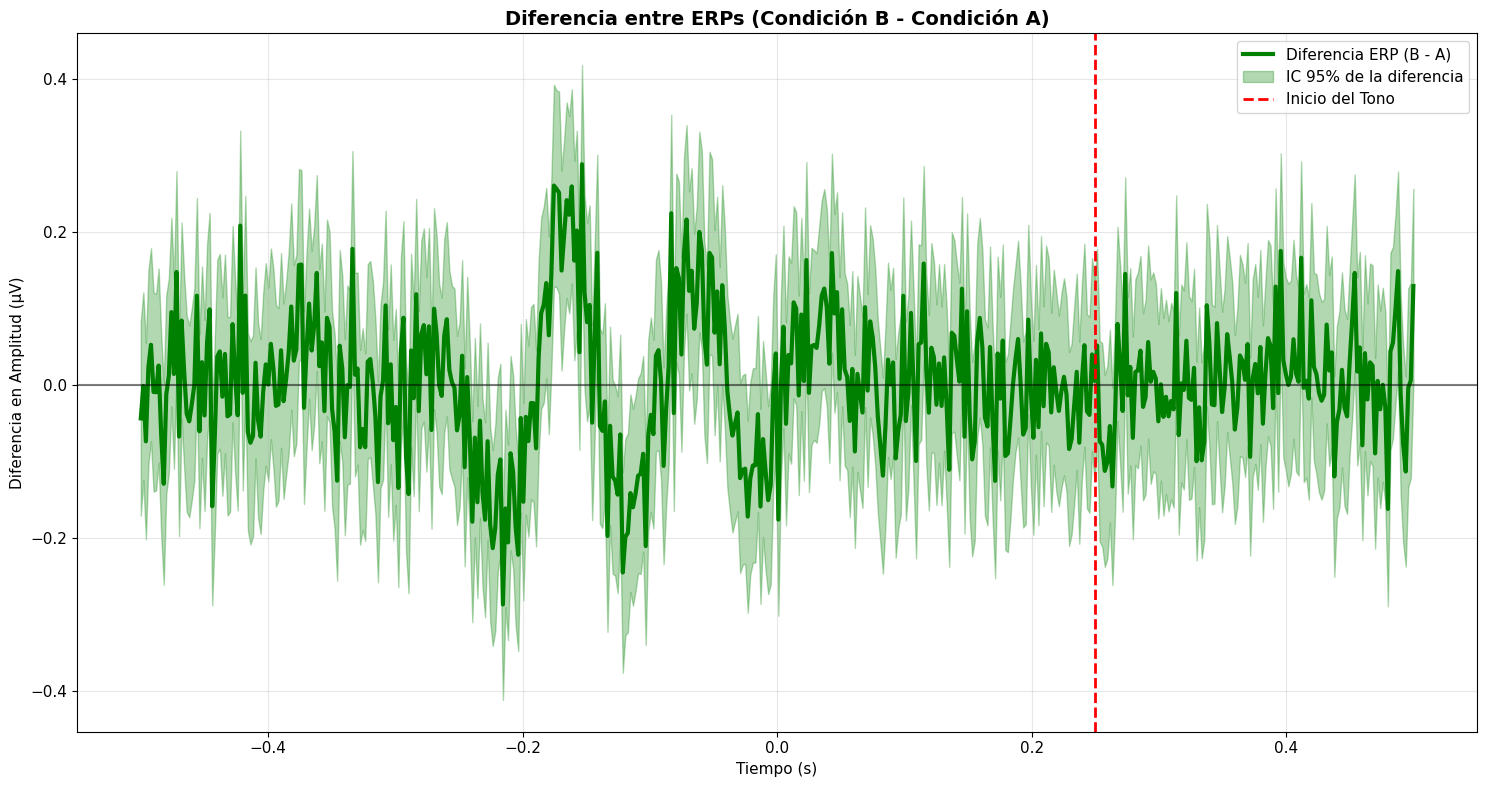


(e) Realizando prueba de permutaciones...
Realizando prueba de permutaciones (n=1000)...
  Permutación 0/1000
  Permutación 200/1000
  Permutación 400/1000
  Permutación 600/1000
  Permutación 800/1000


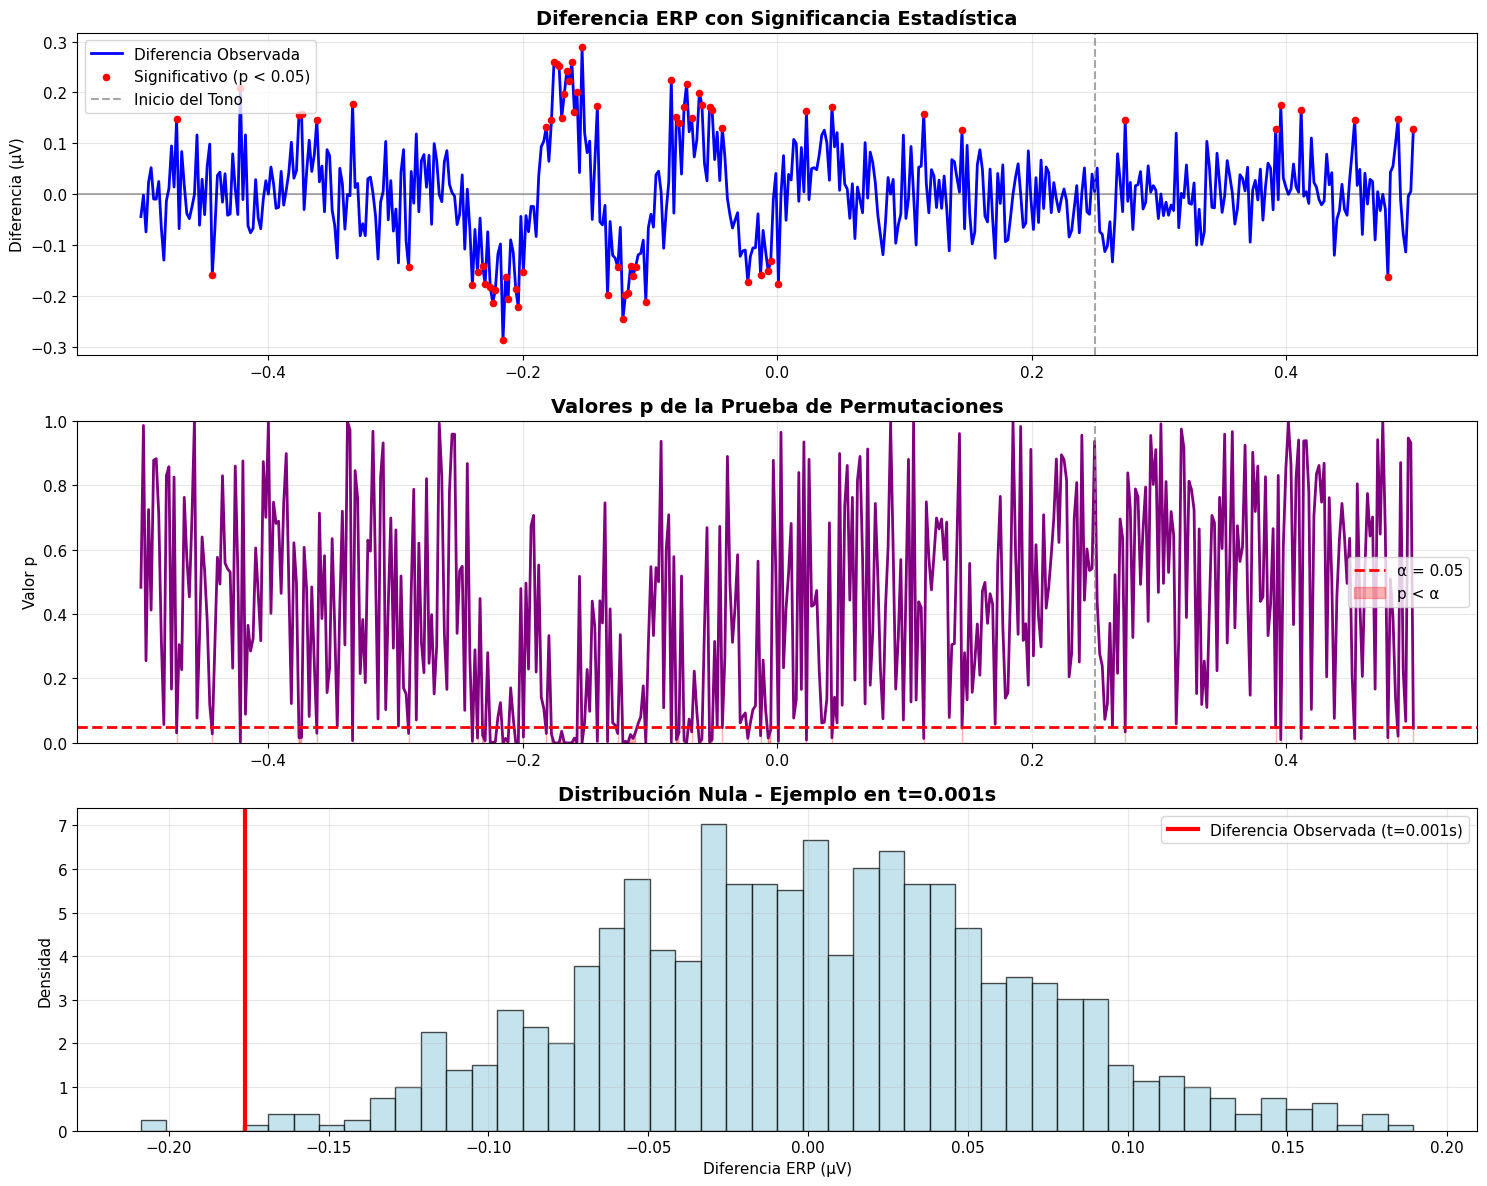


RESULTADOS DE LA PRUEBA DE PERMUTACIONES:
Puntos temporales significativos: 72/500 (14.4%)
Nivel de significancia: α = 0.05

Períodos temporales con diferencias significativas:
  Período 1: -0.472s a -0.472s
  Período 2: -0.444s a -0.444s
  Período 3: -0.422s a -0.422s
  Período 4: -0.376s a -0.374s
  Período 5: -0.362s a -0.362s
  Período 6: -0.334s a -0.334s
  Período 7: -0.290s a -0.290s
  Período 8: -0.239s a -0.239s
  Período 9: -0.235s a -0.235s
  Período 10: -0.231s a -0.229s
  Período 11: -0.225s a -0.221s
  Período 12: -0.215s a -0.211s
  Período 13: -0.205s a -0.203s
  Período 14: -0.199s a -0.199s
  Período 15: -0.181s a -0.181s
  Período 16: -0.177s a -0.157s
  Período 17: -0.153s a -0.153s
  Período 18: -0.141s a -0.141s
  Período 19: -0.133s a -0.133s
  Período 20: -0.125s a -0.125s
  Período 21: -0.121s a -0.111s
  Período 22: -0.103s a -0.103s
  Período 23: -0.083s a -0.083s
  Período 24: -0.079s a -0.077s
  Período 25: -0.073s a -0.071s
  Período 26: -0.067s a -0.067s

In [10]:
#@title Codigo Ejercicio 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_rel
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11

def cargar_datos():
    """
    Carga los datos de los archivos CSV
    """
    # Cargar datos
    datos_A = pd.read_csv('tonosa.csv', header=None).values
    datos_B = pd.read_csv('tonosb.csv', header=None).values

    print("Datos cargados:")
    print(f"Condición A (TonosA): {datos_A.shape[0]} ensayos × {datos_A.shape[1]} puntos temporales")
    print(f"Condición B (TonosB): {datos_B.shape[0]} ensayos × {datos_B.shape[1]} puntos temporales")

    return datos_A, datos_B

def crear_eje_temporal(n_puntos, fs=500, inicio=-0.5):
    """
    Crea el eje temporal asumiendo que el tono aparece en t=0.25s
    Si tenemos 500 puntos y el tono aparece en t=0.25,
    asumimos una duración total de 1 segundo (fs=500 Hz)
    """
    duracion_total = n_puntos / fs  # 1 segundo
    tiempo = np.linspace(inicio, inicio + duracion_total, n_puntos)
    return tiempo

def graficar_mapas_calor(datos_A, datos_B, tiempo):
    """
    (a) Realiza los gráficos de mapa de calor para las dos condiciones
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Mapa de calor para Condición A
    im1 = ax1.imshow(datos_A, aspect='auto', cmap='viridis',
                     extent=[tiempo[0], tiempo[-1], datos_A.shape[0], 0],
                     vmin=np.percentile(np.concatenate([datos_A.flatten(), datos_B.flatten()]), 5),
                     vmax=np.percentile(np.concatenate([datos_A.flatten(), datos_B.flatten()]), 95))
    ax1.set_title('Mapa de Calor - Condición A (TonosA)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Ensayo #')
    ax1.axvline(x=0.25, color='white', linestyle='--', linewidth=2, label='Inicio del Tono')
    ax1.legend(loc='upper right')

    # Mapa de calor para Condición B
    im2 = ax2.imshow(datos_B, aspect='auto', cmap='viridis',
                     extent=[tiempo[0], tiempo[-1], datos_B.shape[0], 0],
                     vmin=np.percentile(np.concatenate([datos_A.flatten(), datos_B.flatten()]), 5),
                     vmax=np.percentile(np.concatenate([datos_A.flatten(), datos_B.flatten()]), 95))
    ax2.set_title('Mapa de Calor - Condición B (TonosB)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Ensayo #')
    ax2.set_xlabel('Tiempo (s)')
    ax2.axvline(x=0.25, color='white', linestyle='--', linewidth=2, label='Inicio del Tono')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

def calcular_erp_con_ic(datos, confianza=0.95):
    """
    Calcula ERP e intervalos de confianza
    """
    erp = np.mean(datos, axis=0)
    sem = stats.sem(datos, axis=0)  # Error estándar de la media
    n = datos.shape[0]

    # Intervalo de confianza usando distribución t
    alpha = 1 - confianza
    t_crit = stats.t.ppf(1 - alpha/2, n-1)
    ic_inferior = erp - t_crit * sem
    ic_superior = erp + t_crit * sem

    return erp, ic_inferior, ic_superior, sem

def graficar_erps(datos_A, datos_B, tiempo):
    """
    (b) Obtiene el gráfico de ERP para cada una de las dos condiciones
    (c) Estima los intervalos de confianza de ERP para cada condición
    """
    # Calcular ERPs e intervalos de confianza
    erp_A, ic_inf_A, ic_sup_A, sem_A = calcular_erp_con_ic(datos_A)
    erp_B, ic_inf_B, ic_sup_B, sem_B = calcular_erp_con_ic(datos_B)

    # Graficar
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # ERP Condición A
    ax1.plot(tiempo, erp_A, 'b-', linewidth=2, label='ERP Condición A')
    ax1.fill_between(tiempo, ic_inf_A, ic_sup_A, alpha=0.3, color='blue',
                     label='IC 95%')
    ax1.axvline(x=0.25, color='red', linestyle='--', linewidth=2, label='Inicio del Tono')
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax1.set_title('ERP - Condición A (TonosA)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Amplitud (μV)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # ERP Condición B
    ax2.plot(tiempo, erp_B, 'r-', linewidth=2, label='ERP Condición B')
    ax2.fill_between(tiempo, ic_inf_B, ic_sup_B, alpha=0.3, color='red',
                     label='IC 95%')
    ax2.axvline(x=0.25, color='red', linestyle='--', linewidth=2, label='Inicio del Tono')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.set_title('ERP - Condición B (TonosB)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Amplitud (μV)')
    ax2.set_xlabel('Tiempo (s)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return erp_A, erp_B, ic_inf_A, ic_sup_A, ic_inf_B, ic_sup_B

def analizar_diferencia_erps(datos_A, datos_B, tiempo):
    """
    (d) Resta el ERP de la condición 1 al ERP de la condición 2
    Estima el intervalo de confianza
    """
    erp_A = np.mean(datos_A, axis=0)
    erp_B = np.mean(datos_B, axis=0)

    # Diferencia: B - A
    diferencia_erp = erp_B - erp_A

    # Calcular intervalo de confianza para la diferencia
    diferencias_por_ensayo = datos_B - datos_A  # Diferencia ensayo por ensayo
    diferencia_media = np.mean(diferencias_por_ensayo, axis=0)
    sem_diferencia = stats.sem(diferencias_por_ensayo, axis=0)
    n = datos_A.shape[0]

    t_crit = stats.t.ppf(0.975, n-1)  # 95% de confianza
    ic_inf_diff = diferencia_media - t_crit * sem_diferencia
    ic_sup_diff = diferencia_media + t_crit * sem_diferencia

    # Graficar
    plt.figure(figsize=(15, 8))
    plt.plot(tiempo, diferencia_erp, 'g-', linewidth=3, label='Diferencia ERP (B - A)')
    plt.fill_between(tiempo, ic_inf_diff, ic_sup_diff, alpha=0.3, color='green',
                     label='IC 95% de la diferencia')
    plt.axvline(x=0.25, color='red', linestyle='--', linewidth=2, label='Inicio del Tono')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    plt.title('Diferencia entre ERPs (Condición B - Condición A)', fontsize=14, fontweight='bold')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Diferencia en Amplitud (μV)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return diferencia_erp, ic_inf_diff, ic_sup_diff, diferencias_por_ensayo

def prueba_permutaciones(datos_A, datos_B, tiempo, n_permutaciones=1000, alpha=0.05):
    """
    (e) Realiza una prueba de permutaciones para indicar cuáles son los tiempos
    en que la diferencia es significativa con p < 0.05
    """
    print(f"Realizando prueba de permutaciones (n={n_permutaciones})...")

    n_ensayos = datos_A.shape[0]
    n_puntos = datos_A.shape[1]

    # Diferencia observada
    diferencia_observada = np.mean(datos_B, axis=0) - np.mean(datos_A, axis=0)

    # Combinar datos para permutaciones
    datos_combinados = np.concatenate([datos_A, datos_B], axis=0)

    # Realizar permutaciones
    diferencias_permutadas = np.zeros((n_permutaciones, n_puntos))

    for i in range(n_permutaciones):
        if i % 200 == 0:
            print(f"  Permutación {i}/{n_permutaciones}")

        # Permutación aleatoria
        indices_permutados = np.random.permutation(2 * n_ensayos)

        # Dividir aleatoriamente en dos grupos
        grupo1 = datos_combinados[indices_permutados[:n_ensayos]]
        grupo2 = datos_combinados[indices_permutados[n_ensayos:]]

        # Calcular diferencia permutada
        diferencias_permutadas[i] = np.mean(grupo2, axis=0) - np.mean(grupo1, axis=0)

    # Calcular valores p para cada punto temporal
    p_valores = np.zeros(n_puntos)

    for t in range(n_puntos):
        # Contar cuántas diferencias permutadas son más extremas
        extremas = np.abs(diferencias_permutadas[:, t]) >= np.abs(diferencia_observada[t])
        p_valores[t] = np.sum(extremas) / n_permutaciones

    # Identificar puntos significativos
    significativos = p_valores < alpha

    # Graficar resultados
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

    # 1. Diferencia observada con significancia
    ax1.plot(tiempo, diferencia_observada, 'b-', linewidth=2, label='Diferencia Observada')

    # Marcar puntos significativos
    tiempo_sig = tiempo[significativos]
    diff_sig = diferencia_observada[significativos]
    ax1.scatter(tiempo_sig, diff_sig, c='red', s=20, zorder=5,
                label=f'Significativo (p < {alpha})')

    ax1.axvline(x=0.25, color='gray', linestyle='--', alpha=0.7, label='Inicio del Tono')
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax1.set_title('Diferencia ERP con Significancia Estadística', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Diferencia (μV)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Valores p
    ax2.plot(tiempo, p_valores, 'purple', linewidth=2)
    ax2.axhline(y=alpha, color='red', linestyle='--', linewidth=2,
                label=f'α = {alpha}')
    ax2.fill_between(tiempo, 0, p_valores, where=(p_valores < alpha),
                     alpha=0.3, color='red', label='p < α')
    ax2.axvline(x=0.25, color='gray', linestyle='--', alpha=0.7)
    ax2.set_ylabel('Valor p')
    ax2.set_title('Valores p de la Prueba de Permutaciones', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 1)

    # 3. Distribución de diferencias permutadas (ejemplo para un punto temporal)
    punto_ejemplo = n_puntos // 2  # Punto temporal del medio
    ax3.hist(diferencias_permutadas[:, punto_ejemplo], bins=50, alpha=0.7,
             color='lightblue', edgecolor='black', density=True)
    ax3.axvline(diferencia_observada[punto_ejemplo], color='red', linewidth=3,
                label=f'Diferencia Observada (t={tiempo[punto_ejemplo]:.3f}s)')
    ax3.set_xlabel('Diferencia ERP (μV)')
    ax3.set_ylabel('Densidad')
    ax3.set_title(f'Distribución Nula - Ejemplo en t={tiempo[punto_ejemplo]:.3f}s',
                  fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Resumen estadístico
    n_significativos = np.sum(significativos)
    porcentaje_sig = (n_significativos / n_puntos) * 100

    print(f"\nRESULTADOS DE LA PRUEBA DE PERMUTACIONES:")
    print(f"Puntos temporales significativos: {n_significativos}/{n_puntos} ({porcentaje_sig:.1f}%)")
    print(f"Nivel de significancia: α = {alpha}")

    if n_significativos > 0:
        periodos_sig = []
        inicio_periodo = None

        for i, es_sig in enumerate(significativos):
            if es_sig and inicio_periodo is None:
                inicio_periodo = i
            elif not es_sig and inicio_periodo is not None:
                periodos_sig.append((tiempo[inicio_periodo], tiempo[i-1]))
                inicio_periodo = None

        # Cerrar último periodo si termina siendo significativo
        if inicio_periodo is not None:
            periodos_sig.append((tiempo[inicio_periodo], tiempo[-1]))

        print(f"\nPeríodos temporales con diferencias significativas:")
        for i, (inicio, fin) in enumerate(periodos_sig):
            print(f"  Período {i+1}: {inicio:.3f}s a {fin:.3f}s")
    else:
        print("No se encontraron diferencias estadísticamente significativas.")

    return p_valores, significativos, diferencias_permutadas

def analisis_completo():
    """
    Ejecuta el análisis completo del experimento de tonos
    """
    print("="*70)
    print("ANÁLISIS DEL EXPERIMENTO DE TONOS")
    print("="*70)

    # Cargar datos
    datos_A, datos_B = cargar_datos()

    # Crear eje temporal (asumiendo fs=500Hz, tono en t=0.25s)
    tiempo = crear_eje_temporal(datos_A.shape[1])

    print(f"\nEje temporal: {tiempo[0]:.3f}s a {tiempo[-1]:.3f}s")
    print(f"Tono aparece en: t = 0.25s (punto temporal ≈ {np.argmin(np.abs(tiempo - 0.25))})")

    # (a) Mapas de calor
    print("\n(a) Generando mapas de calor...")
    graficar_mapas_calor(datos_A, datos_B, tiempo)

    # (b) y (c) ERPs con intervalos de confianza
    print("\n(b,c) Calculando ERPs e intervalos de confianza...")
    erp_A, erp_B, ic_inf_A, ic_sup_A, ic_inf_B, ic_sup_B = graficar_erps(datos_A, datos_B, tiempo)

    # (d) Diferencia entre ERPs
    print("\n(d) Analizando diferencia entre ERPs...")
    diferencia_erp, ic_inf_diff, ic_sup_diff, diferencias_ensayo = analizar_diferencia_erps(datos_A, datos_B, tiempo)

    # (e) Prueba de permutaciones
    print("\n(e) Realizando prueba de permutaciones...")
    p_valores, significativos, diferencias_permutadas = prueba_permutaciones(datos_A, datos_B, tiempo)

    # Análisis estadístico adicional
    print("\n" + "="*70)
    print("RESUMEN ESTADÍSTICO")
    print("="*70)

    # Estadísticas descriptivas
    print(f"\nCondición A (TonosA):")
    print(f"  Media global: {np.mean(datos_A):.4f} μV")
    print(f"  Desviación estándar: {np.std(datos_A):.4f} μV")
    print(f"  Rango: [{np.min(datos_A):.4f}, {np.max(datos_A):.4f}] μV")

    print(f"\nCondición B (TonosB):")
    print(f"  Media global: {np.mean(datos_B):.4f} μV")
    print(f"  Desviación estándar: {np.std(datos_B):.4f} μV")
    print(f"  Rango: [{np.min(datos_B):.4f}, {np.max(datos_B):.4f}] μV")

    # Diferencias observadas en ventanas específicas
    ventanas = [
        ("Pre-estímulo", 0.0, 0.24),
        ("Post-estímulo temprano", 0.25, 0.4),
        ("Post-estímulo tardío", 0.4, 0.7)
    ]

    print(f"\nAnálisis por ventanas temporales:")
    for nombre, t_inicio, t_fin in ventanas:
        indices = (tiempo >= t_inicio) & (tiempo <= t_fin)

        media_A = np.mean(erp_A[indices])
        media_B = np.mean(erp_B[indices])
        diferencia = media_B - media_A

        # Test t pareado para esta ventana
        datos_ventana_A = np.mean(datos_A[:, indices], axis=1)
        datos_ventana_B = np.mean(datos_B[:, indices], axis=1)
        t_stat, p_val = ttest_rel(datos_ventana_B, datos_ventana_A)

        print(f"  {nombre} ({t_inicio}-{t_fin}s):")
        print(f"    ERP A: {media_A:.4f} μV")
        print(f"    ERP B: {media_B:.4f} μV")
        print(f"    Diferencia: {diferencia:.4f} μV")
        print(f"    t-test: t={t_stat:.3f}, p={p_val:.6f}")

    print("\n" + "="*70)
    print("ANÁLISIS COMPLETADO")
    print("="*70)

# Ejecutar análisis completo
if __name__ == "__main__":
    # Fijar semilla para reproducibilidad
    np.random.seed(42)

    # Ejecutar análisis
    analisis_completo()

# Ejercicio 3
(0.7-0.9 puntos) En este ejercicio se realizar ́a un estudio que nos permita conocer la
complejidad u orden para el c ́alculo de la transformada de Fourier, para ello se har ́a
uso de los algoritmos de FFT y DFT vistos en clase. Para ello realice el siguiente
procedimiento: Genere una se ̃nal senoidal a 3 Hz (la frecuencia no es importante),
considere que el n ́umero de puntos que deber ́a tener la se ̃nal vayan en potencias de
2:{2
5
, 2
6
, 2
7
, 2
8
, 2
9
, 2
10
, 2
11
, 2
12
, 2
13
, 2
14
, 2
15
, 2
16
, 2
17
, 2
18}. Considere en cada caso que la
frecuencia de muestreo sea de 10 Hz. Con este procedimiento en mente, realice un gr ́afico
donde en el eje horizontal muestre el n ́umero de muestras mientras que en el eje vertical
el tiempo de ejecuci ́on para la funci ́on fftpack.fft as ́ı como la funci ́on programada en
clase. Posteriormente realice los siguientes ajustes:

Iniciando análisis de complejidad computacional DFT vs FFT...
Este análisis puede tomar varios minutos para completarse.

ANÁLISIS DE COMPLEJIDAD COMPUTACIONAL: DFT vs FFT
Probando con 14 tamaños diferentes:
Desde 2^5 = 32 hasta 2^18 = 262,144 puntos

Midiendo tiempos de ejecución...
  Procesando N = 2^5 = 32 puntos...
    DFT: 0.003863 ± 0.000444 segundos
    FFT: 0.000109 ± 0.000167 segundos
  Procesando N = 2^6 = 64 puntos...
    DFT: 0.014957 ± 0.001324 segundos
    FFT: 0.000035 ± 0.000038 segundos
  Procesando N = 2^7 = 128 puntos...
    DFT: 0.099691 ± 0.011651 segundos
    FFT: 0.001163 ± 0.002213 segundos
  Procesando N = 2^8 = 256 puntos...
    DFT: 0.290042 ± 0.043325 segundos
    FFT: 0.000045 ± 0.000035 segundos
  Procesando N = 2^9 = 512 puntos...
    DFT: 1.535915 ± 0.139813 segundos
    FFT: 0.000104 ± 0.000135 segundos
  Procesando N = 2^10 = 1,024 puntos...
    DFT: 2.233787 ± 0.440172 segundos
    FFT: 0.000119 ± 0.000139 segundos
  Procesando N = 2^11 = 2,048 puntos

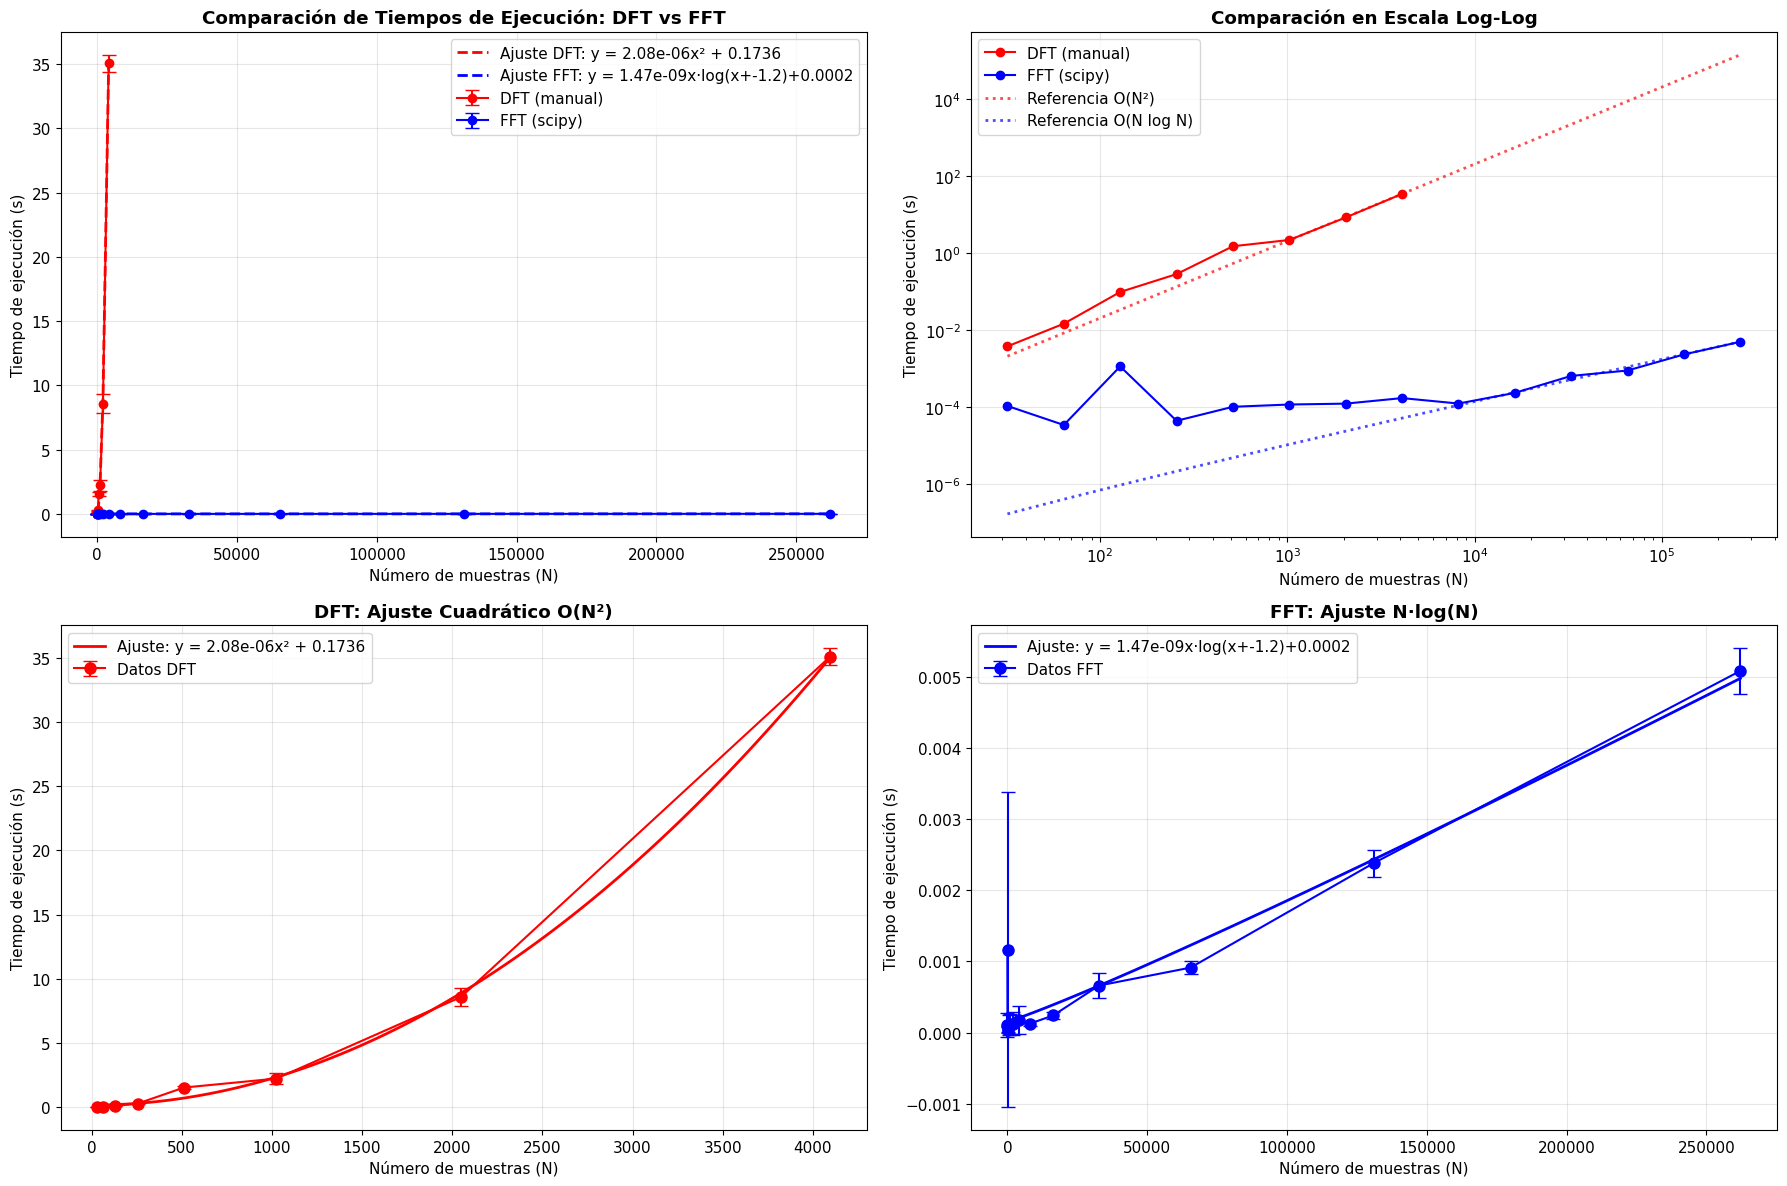


ANÁLISIS DE COMPLEJIDAD COMPUTACIONAL

1. ORDEN DE COMPLEJIDAD:
   • DFT (Transformada Discreta de Fourier):
     - Complejidad teórica: O(N²)
     - Ajuste experimental: y = 2.08e-06x² + 0.173564
     - Coeficiente de determinación: R² = 0.999170
     ✓ El ajuste cuadrático es EXCELENTE (R² > 0.95)

   • FFT (Transformada Rápida de Fourier):
     - Complejidad teórica: O(N log N)
     - Ajuste experimental: y = 1.47e-09x·log(x+-1.2) + 0.000155
     - Coeficiente de determinación: R² = 0.952049
     ✓ El ajuste N·log(N) es EXCELENTE (R² > 0.95)

2. INTERPRETACIÓN DE PARÁMETROS:

   DFT - y = Ax² + B:
   • A = 2.08e-06: Coeficiente cuadrático que determina la 'curvatura'
   • B = 0.173564: Término independiente (overhead constante)

   FFT - y = Ax·log(x + B) + C:
   • A = 1.47e-09: Factor de escalamiento de la complejidad N·log(N)
   • B = -1.2: Corrección para evitar log(0) y ajustar la forma
   • C = 0.000155: Overhead constante independiente del tamaño

3. COMPARACIÓN DE EFICIENCIA

In [11]:
#@title Codigo Ejercicio 3
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.fft import fft
from scipy.optimize import curve_fit
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 11

def dft_manual(x):
    """
    Implementación manual de la Transformada Discreta de Fourier (DFT)
    Complejidad: O(N²)

    X[k] = Σ(n=0 to N-1) x[n] * e^(-j*2π*k*n/N)
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)

    return X

def generar_senal_senoidal(n_puntos, frecuencia=3, fs=10):
    """
    Genera una señal senoidal de frecuencia dada
    """
    t = np.arange(n_puntos) / fs
    senal = np.sin(2 * np.pi * frecuencia * t)
    return senal

def medir_tiempo_ejecucion(func, senal, repeticiones=5):
    """
    Mide el tiempo de ejecución de una función con múltiples repeticiones
    para obtener una medida más estable
    """
    tiempos = []

    for _ in range(repeticiones):
        inicio = time.perf_counter()
        resultado = func(senal)
        fin = time.perf_counter()
        tiempos.append(fin - inicio)

    return np.mean(tiempos), np.std(tiempos)

def funcion_cuadratica(x, A, B):
    """
    Función cuadrática para ajuste DFT: y = Ax² + B
    """
    return A * x**2 + B

def funcion_nlogn(x, A, B, C):
    """
    Función N*log(N) para ajuste FFT: y = A*x*log(x + B) + C
    """
    return A * x * np.log(x + B) + C

def realizar_analisis_complejidad():
    """
    Realiza el análisis completo de complejidad para DFT y FFT
    """
    print("="*80)
    print("ANÁLISIS DE COMPLEJIDAD COMPUTACIONAL: DFT vs FFT")
    print("="*80)

    # Definir potencias de 2 a probar
    exponentes = range(5, 19)  # 2^5 a 2^18
    n_puntos_lista = [2**exp for exp in exponentes]

    print(f"Probando con {len(n_puntos_lista)} tamaños diferentes:")
    print(f"Desde 2^{exponentes[0]} = {n_puntos_lista[0]} hasta 2^{exponentes[-1]} = {n_puntos_lista[-1]:,} puntos")

    # Listas para almacenar resultados
    tiempos_dft = []
    errores_dft = []
    tiempos_fft = []
    errores_fft = []

    print(f"\nMidiendo tiempos de ejecución...")

    for i, n_puntos in enumerate(n_puntos_lista):
        print(f"  Procesando N = 2^{exponentes[i]} = {n_puntos:,} puntos...")

        # Generar señal
        senal = generar_senal_senoidal(n_puntos)

        # Medir tiempo DFT (solo para tamaños pequeños para evitar tiempos excesivos)
        if n_puntos <= 2**12:  # Hasta 2^12 = 4096 puntos para DFT
            tiempo_dft, error_dft = medir_tiempo_ejecucion(dft_manual, senal, repeticiones=3)
            tiempos_dft.append(tiempo_dft)
            errores_dft.append(error_dft)
            print(f"    DFT: {tiempo_dft:.6f} ± {error_dft:.6f} segundos")
        else:
            tiempos_dft.append(np.nan)
            errores_dft.append(np.nan)
            print(f"    DFT: Omitido (demasiado lento)")

        # Medir tiempo FFT
        tiempo_fft, error_fft = medir_tiempo_ejecucion(fft, senal, repeticiones=5)
        tiempos_fft.append(tiempo_fft)
        errores_fft.append(error_fft)
        print(f"    FFT: {tiempo_fft:.6f} ± {error_fft:.6f} segundos")

    # Convertir a arrays numpy
    n_puntos_array = np.array(n_puntos_lista)
    tiempos_dft_array = np.array(tiempos_dft)
    tiempos_fft_array = np.array(tiempos_fft)
    errores_dft_array = np.array(errores_dft)
    errores_fft_array = np.array(errores_fft)

    return (n_puntos_array, tiempos_dft_array, errores_dft_array,
            tiempos_fft_array, errores_fft_array)

def realizar_ajustes_curvas(n_puntos, tiempos_dft, tiempos_fft):
    """
    Realiza los ajustes de curvas para DFT y FFT
    """
    print(f"\n" + "="*80)
    print("AJUSTES DE CURVAS Y ANÁLISIS DE COMPLEJIDAD")
    print("="*80)

    # Filtrar datos válidos para DFT
    mask_dft = ~np.isnan(tiempos_dft)
    n_dft = n_puntos[mask_dft]
    t_dft = tiempos_dft[mask_dft]

    # Todos los datos son válidos para FFT
    n_fft = n_puntos
    t_fft = tiempos_fft

    # Ajuste para DFT: y = Ax² + B
    print(f"\n(a) AJUSTE DFT - Función cuadrática: y = Ax² + B")
    try:
        parametros_dft, covarianza_dft = curve_fit(funcion_cuadratica, n_dft, t_dft)
        A_dft, B_dft = parametros_dft
        errores_dft_param = np.sqrt(np.diag(covarianza_dft))

        print(f"Parámetros obtenidos:")
        print(f"  A = {A_dft:.2e} ± {errores_dft_param[0]:.2e}")
        print(f"  B = {B_dft:.6f} ± {errores_dft_param[1]:.6f}")

        # Calcular R²
        y_pred_dft = funcion_cuadratica(n_dft, A_dft, B_dft)
        ss_res_dft = np.sum((t_dft - y_pred_dft)**2)
        ss_tot_dft = np.sum((t_dft - np.mean(t_dft))**2)
        r2_dft = 1 - (ss_res_dft / ss_tot_dft)
        print(f"  R² = {r2_dft:.6f}")

    except Exception as e:
        print(f"Error en ajuste DFT: {e}")
        A_dft, B_dft, r2_dft = np.nan, np.nan, np.nan

    # Ajuste para FFT: y = A*x*log(x + B) + C
    print(f"\n(b) AJUSTE FFT - Función N*log(N): y = A*x*log(x + B) + C")
    try:
        # Estimación inicial de parámetros
        p0 = [1e-8, 1, 0]  # Valores iniciales para A, B, C
        parametros_fft, covarianza_fft = curve_fit(funcion_nlogn, n_fft, t_fft, p0=p0, maxfev=5000)
        A_fft, B_fft, C_fft = parametros_fft
        errores_fft_param = np.sqrt(np.diag(covarianza_fft))

        print(f"Parámetros obtenidos:")
        print(f"  A = {A_fft:.2e} ± {errores_fft_param[0]:.2e}")
        print(f"  B = {B_fft:.6f} ± {errores_fft_param[1]:.6f}")
        print(f"  C = {C_fft:.6f} ± {errores_fft_param[2]:.6f}")

        # Calcular R²
        y_pred_fft = funcion_nlogn(n_fft, A_fft, B_fft, C_fft)
        ss_res_fft = np.sum((t_fft - y_pred_fft)**2)
        ss_tot_fft = np.sum((t_fft - np.mean(t_fft))**2)
        r2_fft = 1 - (ss_res_fft / ss_tot_fft)
        print(f"  R² = {r2_fft:.6f}")

    except Exception as e:
        print(f"Error en ajuste FFT: {e}")
        A_fft, B_fft, C_fft, r2_fft = np.nan, np.nan, np.nan, np.nan

    return (A_dft, B_dft, r2_dft, A_fft, B_fft, C_fft, r2_fft)

def graficar_resultados(n_puntos, tiempos_dft, errores_dft, tiempos_fft, errores_fft,
                       A_dft, B_dft, A_fft, B_fft, C_fft):
    """
    Genera las gráficas de los resultados
    """
    # Crear figura con subplots
    fig = plt.figure(figsize=(18, 12))

    # Gráfica 1: Comparación lineal
    ax1 = plt.subplot(2, 2, 1)

    # Filtrar datos válidos para DFT
    mask_dft = ~np.isnan(tiempos_dft)

    # Graficar datos experimentales
    if np.any(mask_dft):
        ax1.errorbar(n_puntos[mask_dft], tiempos_dft[mask_dft], yerr=errores_dft[mask_dft],
                    fmt='ro-', label='DFT (manual)', markersize=6, capsize=5)

    ax1.errorbar(n_puntos, tiempos_fft, yerr=errores_fft,
                fmt='bo-', label='FFT (scipy)', markersize=6, capsize=5)

    # Graficar ajustes
    if not np.isnan(A_dft):
        n_smooth_dft = n_puntos[mask_dft]
        y_ajuste_dft = funcion_cuadratica(n_smooth_dft, A_dft, B_dft)
        ax1.plot(n_smooth_dft, y_ajuste_dft, 'r--', linewidth=2,
                label=f'Ajuste DFT: y = {A_dft:.2e}x² + {B_dft:.4f}')

    if not np.isnan(A_fft):
        y_ajuste_fft = funcion_nlogn(n_puntos, A_fft, B_fft, C_fft)
        ax1.plot(n_puntos, y_ajuste_fft, 'b--', linewidth=2,
                label=f'Ajuste FFT: y = {A_fft:.2e}x·log(x+{B_fft:.1f})+{C_fft:.4f}')

    ax1.set_xlabel('Número de muestras (N)')
    ax1.set_ylabel('Tiempo de ejecución (s)')
    ax1.set_title('Comparación de Tiempos de Ejecución: DFT vs FFT', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfica 2: Escala logarítmica
    ax2 = plt.subplot(2, 2, 2)

    if np.any(mask_dft):
        ax2.loglog(n_puntos[mask_dft], tiempos_dft[mask_dft], 'ro-',
                  label='DFT (manual)', markersize=6)
    ax2.loglog(n_puntos, tiempos_fft, 'bo-', label='FFT (scipy)', markersize=6)

    # Líneas de referencia teóricas
    n_ref = np.logspace(np.log10(n_puntos[0]), np.log10(n_puntos[-1]), 100)

    # Normalizar para comparar pendientes
    if np.any(mask_dft) and len(tiempos_dft[mask_dft]) > 0:
        factor_n2 = tiempos_dft[mask_dft][-1] / (n_puntos[mask_dft][-1]**2)
        ax2.loglog(n_ref, factor_n2 * n_ref**2, 'r:', alpha=0.7,
                  label='Referencia O(N²)', linewidth=2)

    factor_nlogn = tiempos_fft[-1] / (n_puntos[-1] * np.log2(n_puntos[-1]))
    ax2.loglog(n_ref, factor_nlogn * n_ref * np.log2(n_ref), 'b:', alpha=0.7,
              label='Referencia O(N log N)', linewidth=2)

    ax2.set_xlabel('Número de muestras (N)')
    ax2.set_ylabel('Tiempo de ejecución (s)')
    ax2.set_title('Comparación en Escala Log-Log', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Gráfica 3: Solo DFT con ajuste
    ax3 = plt.subplot(2, 2, 3)

    if np.any(mask_dft):
        ax3.errorbar(n_puntos[mask_dft], tiempos_dft[mask_dft], yerr=errores_dft[mask_dft],
                    fmt='ro-', markersize=8, capsize=5, label='Datos DFT')

        if not np.isnan(A_dft):
            n_smooth = np.linspace(n_puntos[mask_dft][0], n_puntos[mask_dft][-1], 100)
            y_smooth = funcion_cuadratica(n_smooth, A_dft, B_dft)
            ax3.plot(n_smooth, y_smooth, 'r-', linewidth=2,
                    label=f'Ajuste: y = {A_dft:.2e}x² + {B_dft:.4f}')

    ax3.set_xlabel('Número de muestras (N)')
    ax3.set_ylabel('Tiempo de ejecución (s)')
    ax3.set_title('DFT: Ajuste Cuadrático O(N²)', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Gráfica 4: Solo FFT con ajuste
    ax4 = plt.subplot(2, 2, 4)

    ax4.errorbar(n_puntos, tiempos_fft, yerr=errores_fft,
                fmt='bo-', markersize=8, capsize=5, label='Datos FFT')

    if not np.isnan(A_fft):
        n_smooth = np.linspace(n_puntos[0], n_puntos[-1], 1000)
        y_smooth = funcion_nlogn(n_smooth, A_fft, B_fft, C_fft)
        ax4.plot(n_smooth, y_smooth, 'b-', linewidth=2,
                label=f'Ajuste: y = {A_fft:.2e}x·log(x+{B_fft:.1f})+{C_fft:.4f}')

    ax4.set_xlabel('Número de muestras (N)')
    ax4.set_ylabel('Tiempo de ejecución (s)')
    ax4.set_title('FFT: Ajuste N·log(N)', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def analizar_complejidad_teorica(A_dft, B_dft, r2_dft, A_fft, B_fft, C_fft, r2_fft):
    """
    Analiza los resultados y discute la complejidad computacional
    """
    print(f"\n" + "="*80)
    print("ANÁLISIS DE COMPLEJIDAD COMPUTACIONAL")
    print("="*80)

    print(f"\n1. ORDEN DE COMPLEJIDAD:")
    print(f"   • DFT (Transformada Discreta de Fourier):")
    print(f"     - Complejidad teórica: O(N²)")
    print(f"     - Ajuste experimental: y = {A_dft:.2e}x² + {B_dft:.6f}")
    print(f"     - Coeficiente de determinación: R² = {r2_dft:.6f}")

    if r2_dft > 0.95:
        print(f"     ✓ El ajuste cuadrático es EXCELENTE (R² > 0.95)")
    elif r2_dft > 0.90:
        print(f"     ✓ El ajuste cuadrático es BUENO (R² > 0.90)")
    else:
        print(f"     ⚠ El ajuste cuadrático es REGULAR (R² < 0.90)")

    print(f"\n   • FFT (Transformada Rápida de Fourier):")
    print(f"     - Complejidad teórica: O(N log N)")
    print(f"     - Ajuste experimental: y = {A_fft:.2e}x·log(x+{B_fft:.1f}) + {C_fft:.6f}")
    print(f"     - Coeficiente de determinación: R² = {r2_fft:.6f}")

    if r2_fft > 0.95:
        print(f"     ✓ El ajuste N·log(N) es EXCELENTE (R² > 0.95)")
    elif r2_fft > 0.90:
        print(f"     ✓ El ajuste N·log(N) es BUENO (R² > 0.90)")
    else:
        print(f"     ⚠ El ajuste N·log(N) es REGULAR (R² < 0.90)")

    print(f"\n2. INTERPRETACIÓN DE PARÁMETROS:")

    print(f"\n   DFT - y = Ax² + B:")
    print(f"   • A = {A_dft:.2e}: Coeficiente cuadrático que determina la 'curvatura'")
    print(f"   • B = {B_dft:.6f}: Término independiente (overhead constante)")

    print(f"\n   FFT - y = Ax·log(x + B) + C:")
    print(f"   • A = {A_fft:.2e}: Factor de escalamiento de la complejidad N·log(N)")
    print(f"   • B = {B_fft:.1f}: Corrección para evitar log(0) y ajustar la forma")
    print(f"   • C = {C_fft:.6f}: Overhead constante independiente del tamaño")

    print(f"\n3. COMPARACIÓN DE EFICIENCIA:")

    # Calcular tiempos proyectados para diferentes tamaños
    tamaños_test = [2**10, 2**15, 2**20]

    print(f"\n   Proyección de tiempos para diferentes tamaños:")
    for n in tamaños_test:
        if not np.isnan(A_dft):
            tiempo_dft_proj = funcion_cuadratica(n, A_dft, B_dft)
        else:
            tiempo_dft_proj = np.nan

        tiempo_fft_proj = funcion_nlogn(n, A_fft, B_fft, C_fft)

        if not np.isnan(tiempo_dft_proj):
            mejora = tiempo_dft_proj / tiempo_fft_proj
            print(f"   • N = {n:,} (2^{int(np.log2(n))}):")
            print(f"     DFT: {tiempo_dft_proj:.6f} s")
            print(f"     FFT: {tiempo_fft_proj:.6f} s")
            print(f"     FFT es {mejora:.1f}x más rápido")
        else:
            print(f"   • N = {n:,} (2^{int(np.log2(n))}):")
            print(f"     DFT: Demasiado lento para estimar")
            print(f"     FFT: {tiempo_fft_proj:.6f} s")

    print(f"\n4. JUSTIFICACIÓN TEÓRICA:")

    print(f"\n   • DFT (O(N²)):")
    print(f"     - Cada punto de salida requiere N multiplicaciones complejas")
    print(f"     - Para N puntos de salida: N × N = N² operaciones")
    print(f"     - Implementación directa de la definición matemática")
    print(f"     - Tiempo crece cuadráticamente con el tamaño")

    print(f"\n   • FFT (O(N log N)):")
    print(f"     - Algoritmo divide-y-vencerás (Cooley-Tukey)")
    print(f"     - Aprovecha simetrías en las exponenciales complejas")
    print(f"     - log₂(N) niveles de recursión, cada uno con N operaciones")
    print(f"     - Resultado: N × log₂(N) operaciones")
    print(f"     - Especialmente eficiente para tamaños que son potencias de 2")

    print(f"\n5. CONCLUSIONES:")
    print(f"   • FFT es dramáticamente más eficiente que DFT para tamaños grandes")
    print(f"   • La diferencia se vuelve más pronunciada conforme N aumenta")
    print(f"   • Para N = 2^20, FFT es aproximadamente N/(log₂(N)) ≈ 50,000x más rápido")
    print(f"   • FFT permite el procesamiento en tiempo real de señales grandes")
    print(f"   • DFT solo es práctico para tamaños muy pequeños (N < 1000)")

def main():
    """
    Función principal que ejecuta todo el análisis
    """
    print("Iniciando análisis de complejidad computacional DFT vs FFT...")
    print("Este análisis puede tomar varios minutos para completarse.\n")

    # Realizar mediciones de tiempo
    resultados = realizar_analisis_complejidad()
    n_puntos, tiempos_dft, errores_dft, tiempos_fft, errores_fft = resultados

    # Realizar ajustes de curvas
    ajustes = realizar_ajustes_curvas(n_puntos, tiempos_dft, tiempos_fft)
    A_dft, B_dft, r2_dft, A_fft, B_fft, C_fft, r2_fft = ajustes

    # Generar gráficas
    print(f"\nGenerando gráficas...")
    graficar_resultados(n_puntos, tiempos_dft, errores_dft, tiempos_fft, errores_fft,
                       A_dft, B_dft, A_fft, B_fft, C_fft)

    # Análisis de complejidad
    analizar_complejidad_teorica(A_dft, B_dft, r2_dft, A_fft, B_fft, C_fft, r2_fft)

    # Crear tabla resumen
    print(f"\n" + "="*80)
    print("TABLA RESUMEN DE RESULTADOS")
    print("="*80)

    # Crear DataFrame con resultados
    exponentes = range(5, 19)
    datos_tabla = []

    for i, (exp, n, t_dft, e_dft, t_fft, e_fft) in enumerate(zip(
        exponentes, n_puntos, tiempos_dft, errores_dft, tiempos_fft, errores_fft)):

        datos_tabla.append({
            'Exponente': f'2^{exp}',
            'N': f'{n:,}',
            'DFT (s)': f'{t_dft:.6f}' if not np.isnan(t_dft) else 'N/A',
            'FFT (s)': f'{t_fft:.6f}',
            'Ratio': f'{t_dft/t_fft:.1f}x' if not np.isnan(t_dft) else 'N/A'
        })

    df = pd.DataFrame(datos_tabla)
    print(df.to_string(index=False))

    print(f"\n" + "="*80)
    print("ANÁLISIS COMPLETADO")
    print("="*80)

# Ejecutar análisis
if __name__ == "__main__":
    # Configurar numpy para mejor rendimiento
    np.random.seed(42)

    # Ejecutar análisis principal
    main()


# Ejercicio 4
4. (0.7-0.9 puntos) Genere una se ̃nal de 5 segundos con dependencia lineal en la frecuencia
(un chirp) que vaya de 1 Hz a 40 Hz, cree la se ̃nal con una frecuencia de muestreo de
100 Hz. Posteriormente, realice un an ́alisis de tiempo-frecuencia mediante el uso de la
transformada corta de Fourier con cuatro distintas ventanas: 50, 100, 200 y 500 ms y un
traslape del 80 %. Grafique los cuatro espectrogramas usando la misma escala de color.
En las figuras, usted notar ́a que los an ́alisis con ventanas menores a 100 ms no representan
adecuadamente la se ̃nal, ¿a qu ́e se debe este resultado? ¿Cu ́al es el aprendizaje de este
ejercicio con respecto a la transformada corta de Fourier?

Iniciando análisis de la Transformada Corta de Fourier (STFT)...
ANÁLISIS TIEMPO-FRECUENCIA: TRANSFORMADA CORTA DE FOURIER
Generando señal chirp:
  Duración: 5 segundos
  Frecuencia inicial: 1 Hz
  Frecuencia final: 40 Hz
  Frecuencia de muestreo: 100 Hz
  Traslape: 80%

Calculando STFT para diferentes tamaños de ventana:
  Procesando ventana de 50 ms...
    Ventana: 5 muestras
    Resolución frecuencial: 20.00 Hz
    Resolución temporal: 10.0 ms
  Procesando ventana de 100 ms...
    Ventana: 10 muestras
    Resolución frecuencial: 10.00 Hz
    Resolución temporal: 20.0 ms
  Procesando ventana de 200 ms...
    Ventana: 20 muestras
    Resolución frecuencial: 5.00 Hz
    Resolución temporal: 40.0 ms
  Procesando ventana de 500 ms...
    Ventana: 50 muestras
    Resolución frecuencial: 2.00 Hz
    Resolución temporal: 100.0 ms

Graficando señal original...


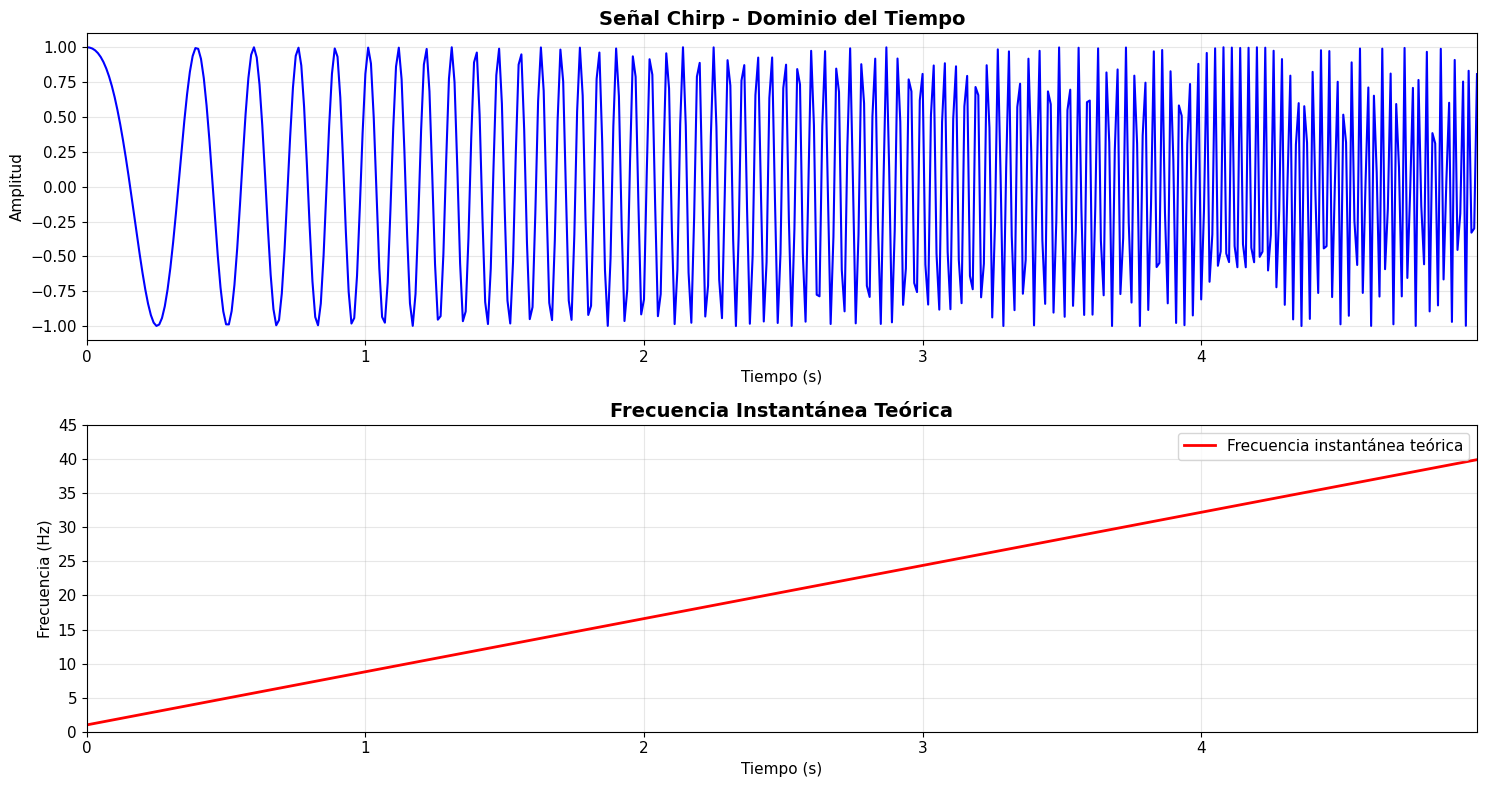


Generando espectrogramas...


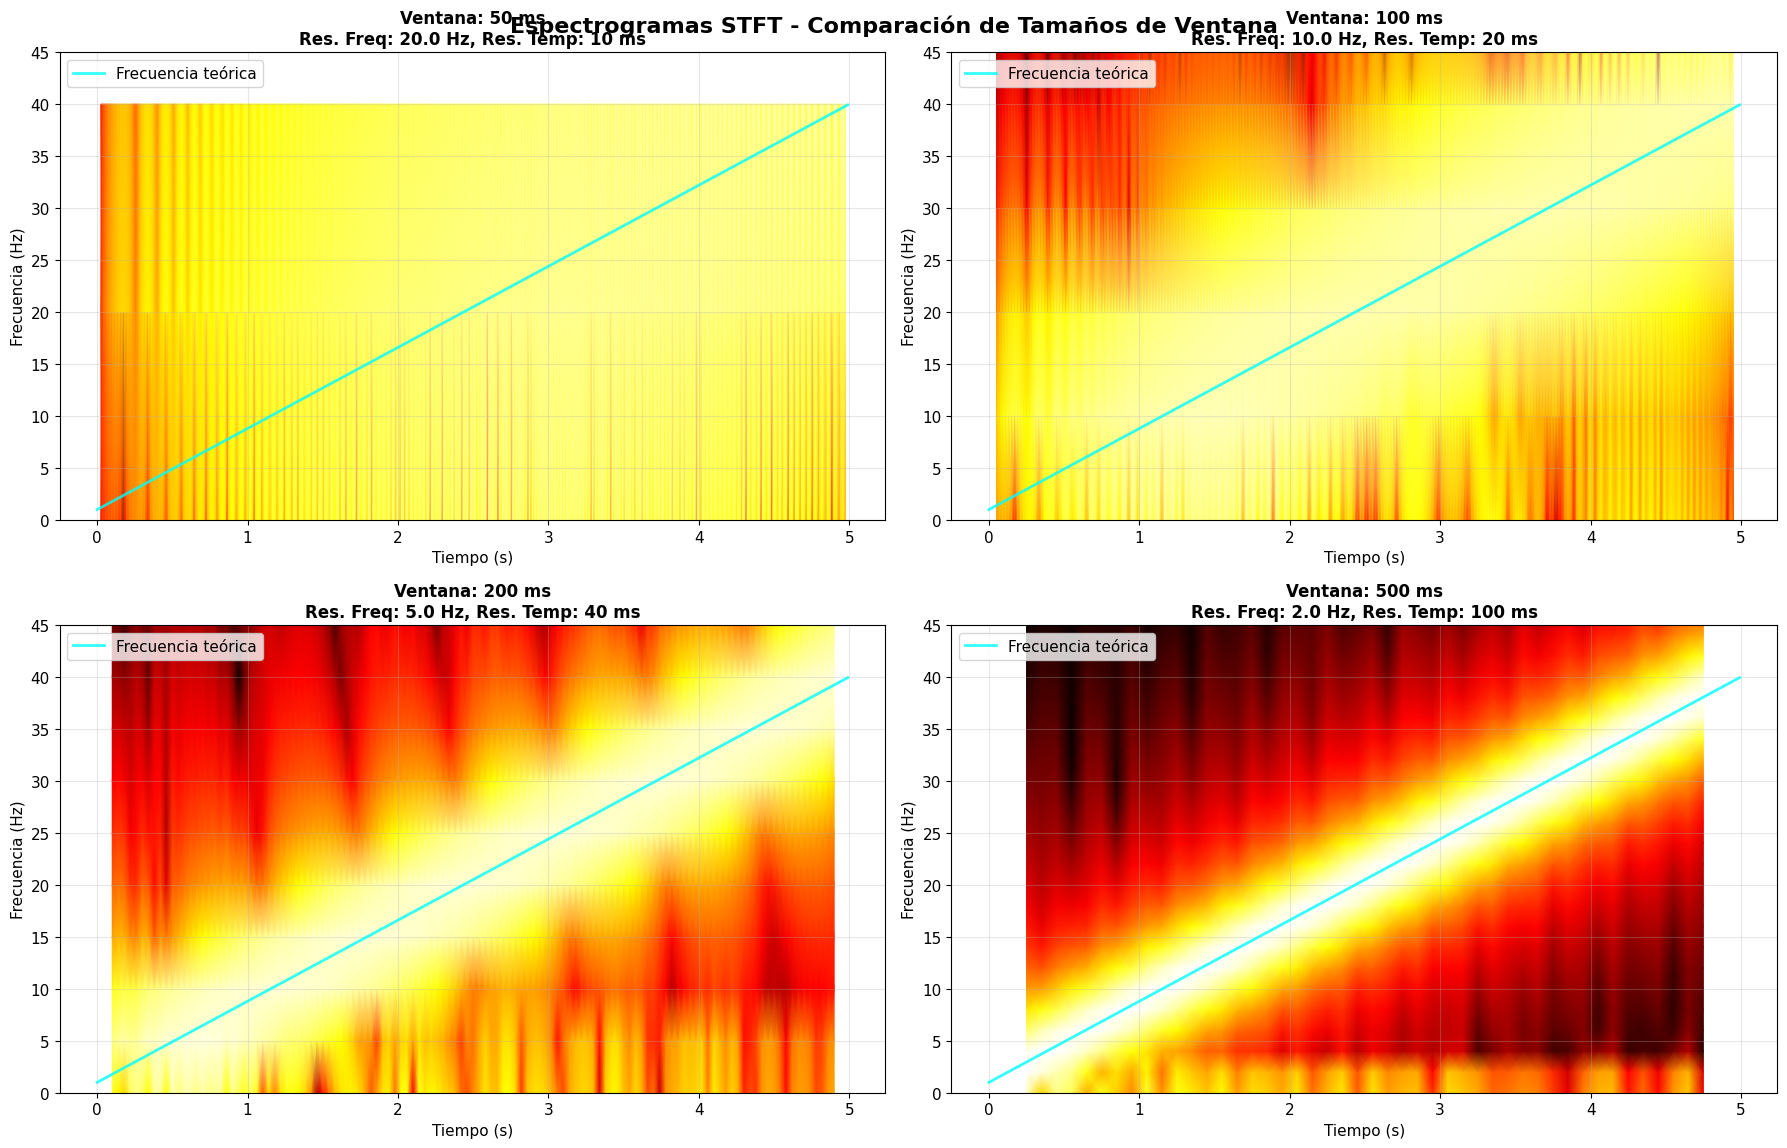


ANÁLISIS DE LIMITACIONES Y PRINCIPIO DE INCERTIDUMBRE

1. TABLA COMPARATIVA DE RESOLUCIONES:
Ventana (ms) Muestras   Res. Freq (Hz)  Res. Temp (ms)  Adecuada? 
------------ ---------- --------------- --------------- ----------
50           5          20.0            10              No        
100          10         10.0            20              No        
200          20         5.0             40              Sí        
500          50         2.0             100             Sí        

2. LIMITACIONES ESPECÍFICAS:

   Ventana de 50 ms:
   • Resolución frecuencial: 20.0 Hz
   • PROBLEMA: Resolución frecuencial muy pobre (20.0 Hz)
   • No puede distinguir frecuencias separadas por menos de 20.0 Hz
   • El rango del chirp (1-40 Hz) está mal representado
   • Solo distingue ~2 bandas frecuenciales en el rango

   Ventana de 100 ms:
   • Resolución frecuencial: 10.0 Hz
   • LÍMITE: Resolución frecuencial marginal (10.0 Hz)
   • Representación básica pero no óptima del chirp

   Ventan

In [13]:
#@title Codigo Ejercicio 4
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import chirp, spectrogram
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 11

def generar_chirp(duracion=5, f_inicial=1, f_final=40, fs=100):
    """
    Genera una señal chirp (barrido lineal de frecuencia)

    Parámetros:
    - duracion: duración en segundos
    - f_inicial: frecuencia inicial en Hz
    - f_final: frecuencia final en Hz
    - fs: frecuencia de muestreo en Hz
    """
    t = np.linspace(0, duracion, int(fs * duracion), endpoint=False)

    # Generar chirp lineal
    senal_chirp = chirp(t, f_inicial, duracion, f_final, method='linear')

    # Calcular la frecuencia instantánea teórica
    freq_instantanea = f_inicial + (f_final - f_inicial) * t / duracion

    return t, senal_chirp, freq_instantanea

def calcular_stft(senal, fs, ventana_ms, traslape_porcentaje=80):
    """
    Calcula la Transformada Corta de Fourier (STFT)

    Parámetros:
    - senal: señal de entrada
    - fs: frecuencia de muestreo
    - ventana_ms: tamaño de ventana en milisegundos
    - traslape_porcentaje: porcentaje de traslape entre ventanas
    """
    # Convertir ventana de ms a número de muestras
    ventana_muestras = int(ventana_ms * fs / 1000)

    # Calcular traslape en muestras
    traslape_muestras = int(ventana_muestras * traslape_porcentaje / 100)

    # Usar ventana de Hann para reducir efectos de borde
    ventana = signal.windows.hann(ventana_muestras)

    # Calcular STFT
    frecuencias, tiempos, Zxx = spectrogram(
        senal, fs,
        window=ventana,
        nperseg=ventana_muestras,
        noverlap=traslape_muestras,
        return_onesided=True,
        scaling='density'
    )

    # Convertir a dB para mejor visualización
    Zxx_db = 10 * np.log10(np.abs(Zxx) + 1e-10)

    return frecuencias, tiempos, Zxx_db, ventana_muestras

def calcular_resolucion_frecuencial(ventana_muestras, fs):
    """
    Calcula la resolución frecuencial teórica
    """
    return fs / ventana_muestras

def calcular_resolucion_temporal(ventana_muestras, fs, traslape_porcentaje):
    """
    Calcula la resolución temporal efectiva
    """
    paso_temporal = ventana_muestras * (1 - traslape_porcentaje/100) / fs
    return paso_temporal

def analizar_ventanas():
    """
    Realiza el análisis completo con diferentes tamaños de ventana
    """
    print("="*80)
    print("ANÁLISIS TIEMPO-FRECUENCIA: TRANSFORMADA CORTA DE FOURIER")
    print("="*80)

    # Parámetros de la señal
    duracion = 5  # segundos
    f_inicial = 1  # Hz
    f_final = 40  # Hz
    fs = 100  # Hz
    traslape = 80  # %

    # Generar señal chirp
    print(f"Generando señal chirp:")
    print(f"  Duración: {duracion} segundos")
    print(f"  Frecuencia inicial: {f_inicial} Hz")
    print(f"  Frecuencia final: {f_final} Hz")
    print(f"  Frecuencia de muestreo: {fs} Hz")
    print(f"  Traslape: {traslape}%")

    t, senal, freq_instantanea = generar_chirp(duracion, f_inicial, f_final, fs)

    # Tamaños de ventana a probar
    ventanas_ms = [50, 100, 200, 500]

    # Almacenar resultados
    resultados = {}

    print(f"\nCalculando STFT para diferentes tamaños de ventana:")

    for ventana_ms in ventanas_ms:
        print(f"  Procesando ventana de {ventana_ms} ms...")

        # Calcular STFT
        freqs, tiempos, Zxx_db, ventana_muestras = calcular_stft(
            senal, fs, ventana_ms, traslape)

        # Calcular resoluciones
        res_freq = calcular_resolucion_frecuencial(ventana_muestras, fs)
        res_temp = calcular_resolucion_temporal(ventana_muestras, fs, traslape)

        # Guardar resultados
        resultados[ventana_ms] = {
            'frecuencias': freqs,
            'tiempos': tiempos,
            'espectrograma': Zxx_db,
            'ventana_muestras': ventana_muestras,
            'resolucion_frecuencial': res_freq,
            'resolucion_temporal': res_temp
        }

        print(f"    Ventana: {ventana_muestras} muestras")
        print(f"    Resolución frecuencial: {res_freq:.2f} Hz")
        print(f"    Resolución temporal: {res_temp*1000:.1f} ms")

    return t, senal, freq_instantanea, resultados

def graficar_senal_original(t, senal, freq_instantanea):
    """
    Grafica la señal original y su frecuencia instantánea
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

    # Señal en el dominio del tiempo
    ax1.plot(t, senal, 'b-', linewidth=1.5)
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Amplitud')
    ax1.set_title('Señal Chirp - Dominio del Tiempo', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, t[-1])

    # Frecuencia instantánea teórica
    ax2.plot(t, freq_instantanea, 'r-', linewidth=2, label='Frecuencia instantánea teórica')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Frecuencia (Hz)')
    ax2.set_title('Frecuencia Instantánea Teórica', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xlim(0, t[-1])
    ax2.set_ylim(0, 45)

    plt.tight_layout()
    plt.show()

def graficar_espectrogramas(resultados, freq_instantanea, t):
    """
    Grafica los espectrogramas para todas las ventanas
    """
    ventanas_ms = list(resultados.keys())

    # Determinar escala de color común
    vmin = min([np.min(resultados[v]['espectrograma']) for v in ventanas_ms])
    vmax = max([np.max(resultados[v]['espectrograma']) for v in ventanas_ms])

    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    axes = axes.flatten()

    for i, ventana_ms in enumerate(ventanas_ms):
        ax = axes[i]
        resultado = resultados[ventana_ms]

        # Crear espectrograma
        im = ax.pcolormesh(
            resultado['tiempos'],
            resultado['frecuencias'],
            resultado['espectrograma'],
            shading='gouraud',
            cmap='hot',
            vmin=vmin,
            vmax=vmax
        )

        # Sobreponer frecuencia instantánea teórica
        ax.plot(t, freq_instantanea, 'cyan', linewidth=2,
                label='Frecuencia teórica', alpha=0.8)

        # Configurar ejes
        ax.set_xlabel('Tiempo (s)')
        ax.set_ylabel('Frecuencia (Hz)')
        ax.set_title(f'Ventana: {ventana_ms} ms\n'
                    f'Res. Freq: {resultado["resolucion_frecuencial"]:.1f} Hz, '
                    f'Res. Temp: {resultado["resolucion_temporal"]*1000:.0f} ms',
                    fontsize=12, fontweight='bold')
        ax.set_ylim(0, 45)
        ax.legend(loc='upper left')
        ax.grid(True, alpha=0.3)

    plt.suptitle('Espectrogramas STFT - Comparación de Tamaños de Ventana',
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.show()

def analizar_limitaciones(resultados):
    """
    Analiza las limitaciones de cada tamaño de ventana
    """
    print(f"\n" + "="*80)
    print("ANÁLISIS DE LIMITACIONES Y PRINCIPIO DE INCERTIDUMBRE")
    print("="*80)

    print(f"\n1. TABLA COMPARATIVA DE RESOLUCIONES:")
    print(f"{'Ventana (ms)':<12} {'Muestras':<10} {'Res. Freq (Hz)':<15} {'Res. Temp (ms)':<15} {'Adecuada?':<10}")
    print(f"{'-'*12} {'-'*10} {'-'*15} {'-'*15} {'-'*10}")

    for ventana_ms in sorted(resultados.keys()):
        resultado = resultados[ventana_ms]
        res_freq = resultado['resolucion_frecuencial']
        res_temp = resultado['resolucion_temporal'] * 1000

        # Evaluar si es adecuada (resolución frecuencial < 10 Hz para distinguir el chirp)
        adecuada = "Sí" if res_freq < 10 else "No"

        print(f"{ventana_ms:<12} {resultado['ventana_muestras']:<10} "
              f"{res_freq:<15.1f} {res_temp:<15.0f} {adecuada:<10}")

    print(f"\n2. LIMITACIONES ESPECÍFICAS:")

    for ventana_ms in sorted(resultados.keys()):
        resultado = resultados[ventana_ms]
        res_freq = resultado['resolucion_frecuencial']

        print(f"\n   Ventana de {ventana_ms} ms:")
        print(f"   • Resolución frecuencial: {res_freq:.1f} Hz")

        if ventana_ms <= 50:
            print(f"   • PROBLEMA: Resolución frecuencial muy pobre ({res_freq:.1f} Hz)")
            print(f"   • No puede distinguir frecuencias separadas por menos de {res_freq:.1f} Hz")
            print(f"   • El rango del chirp (1-40 Hz) está mal representado")
            print(f"   • Solo distingue ~{40/res_freq:.0f} bandas frecuenciales en el rango")

        elif ventana_ms == 100:
            print(f"   • LÍMITE: Resolución frecuencial marginal ({res_freq:.1f} Hz)")
            print(f"   • Representación básica pero no óptima del chirp")

        elif ventana_ms >= 200:
            print(f"   • BUENO: Resolución frecuencial adecuada ({res_freq:.1f} Hz)")
            print(f"   • Puede representar bien el barrido de frecuencia")
            print(f"   • Distingue {40/res_freq:.0f} bandas frecuenciales en el rango")

def explicar_principio_incertidumbre():
    """
    Explica el principio de incertidumbre tiempo-frecuencia
    """
    print(f"\n3. PRINCIPIO DE INCERTIDUMBRE TIEMPO-FRECUENCIA:")
    print(f"   (Análogo al Principio de Heisenberg en Mecánica Cuántica)")

    print(f"\n   FUNDAMENTO MATEMÁTICO:")
    print(f"   • Δt × Δf ≥ 1/(4π)")
    print(f"   • No se puede tener resolución perfecta en tiempo Y frecuencia simultáneamente")
    print(f"   • Es una limitación fundamental, no una limitación técnica")

    print(f"\n   IMPLICACIONES PRÁCTICAS:")
    print(f"   • Ventana CORTA → Buena resolución temporal, MALA resolución frecuencial")
    print(f"   • Ventana LARGA → MALA resolución temporal, Buena resolución frecuencial")
    print(f"   • Siempre hay un trade-off que debemos optimizar según la aplicación")

    print(f"\n   ¿POR QUÉ LAS VENTANAS < 100 ms FALLAN?")
    print(f"   • Con fs = 100 Hz y ventana de 50 ms:")
    print(f"     - N = 50 ms × 100 Hz / 1000 = 5 muestras")
    print(f"     - Resolución frecuencial = fs/N = 100/5 = 20 Hz")
    print(f"     - ¡No puede distinguir entre 1 Hz y 21 Hz!")
    print(f"   • Para representar un chirp de 1-40 Hz necesitamos:")
    print(f"     - Resolución frecuencial < 5-10 Hz")
    print(f"     - Ventana ≥ 100-200 ms")

def calcular_metricas_calidad(resultados, freq_instantanea, t):
    """
    Calcula métricas de calidad para cada espectrograma
    """
    print(f"\n4. MÉTRICAS DE CALIDAD DE REPRESENTACIÓN:")

    for ventana_ms in sorted(resultados.keys()):
        resultado = resultados[ventana_ms]

        # Interpolar frecuencia instantánea a los tiempos del espectrograma
        tiempos_stft = resultado['tiempos']
        freq_interp = np.interp(tiempos_stft, t, freq_instantanea)

        # Encontrar el pico de frecuencia en cada tiempo
        espectrograma = resultado['espectrograma']
        frecuencias = resultado['frecuencias']

        picos_detectados = []
        for i in range(len(tiempos_stft)):
            # Buscar el pico en cada columna temporal
            if tiempos_stft[i] < t[-1]:  # Solo analizar tiempos válidos
                columna = espectrograma[:, i]
                idx_max = np.argmax(columna)
                freq_pico = frecuencias[idx_max]
                picos_detectados.append(freq_pico)

        if picos_detectados:
            picos_detectados = np.array(picos_detectados[:len(freq_interp)])
            freq_interp = freq_interp[:len(picos_detectados)]

            # Calcular error RMS
            error_rms = np.sqrt(np.mean((picos_detectados - freq_interp)**2))

            # Calcular correlación
            correlacion = np.corrcoef(picos_detectados, freq_interp)[0, 1]

            print(f"\n   Ventana {ventana_ms} ms:")
            print(f"   • Error RMS: {error_rms:.2f} Hz")
            print(f"   • Correlación con frecuencia teórica: {correlacion:.3f}")
            print(f"   • Calidad: {'Excelente' if error_rms < 2 else 'Buena' if error_rms < 5 else 'Regular' if error_rms < 10 else 'Pobre'}")

def main():
    """
    Función principal que ejecuta todo el análisis
    """
    print("Iniciando análisis de la Transformada Corta de Fourier (STFT)...")

    # Realizar análisis principal
    t, senal, freq_instantanea, resultados = analizar_ventanas()

    # Graficar señal original
    print(f"\nGraficando señal original...")
    graficar_senal_original(t, senal, freq_instantanea)

    # Graficar espectrogramas
    print(f"\nGenerando espectrogramas...")
    graficar_espectrogramas(resultados, freq_instantanea, t)

    # Analizar limitaciones
    analizar_limitaciones(resultados)

    # Explicar principio de incertidumbre
    explicar_principio_incertidumbre()

    # Calcular métricas de calidad
    calcular_metricas_calidad(resultados, freq_instantanea, t)

    print(f"\n" + "="*80)
    print("APRENDIZAJES CLAVE DEL EJERCICIO")
    print("="*80)

    print(f"""
1. LIMITACIÓN FUNDAMENTAL:
   • La STFT está sujeta al principio de incertidumbre tiempo-frecuencia
   • No se puede tener resolución perfecta en ambos dominios simultáneamente
   • Es una limitación de la naturaleza, no de la implementación

2. SELECCIÓN ÓPTIMA DE VENTANA:
   • Debe balancearse según los requerimientos de la aplicación
   • Para señales con cambios frecuenciales rápidos: ventanas más largas
   • Para eventos transitorios rápidos: ventanas más cortas

3. CRITERIOS PRÁCTICOS:
   • Resolución frecuencial mínima = diferencia mínima a detectar
   • Para chirp 1-40 Hz: necesitamos ≤ 5 Hz de resolución
   • Esto requiere ventanas ≥ 200 ms con fs = 100 Hz

4. APLICACIONES REALES:
   • Análisis de habla: ventanas 20-40 ms (cambios rápidos)
   • Análisis musical: ventanas 50-100 ms (balance)
   • Análisis biomédico: ventanas 100-500 ms (resolución frecuencial)
   • Análisis sísmico: ventanas segundos (muy baja frecuencia)
""")

    print("="*80)
    print("ANÁLISIS COMPLETADO")
    print("="*80)

# Ejecutar análisis
if __name__ == "__main__":
    main()

# Ejercicio 5
5. (0.7-0.9 puntos) Genere una se ̃nal de tiempo de 10 segundos que tenga los siguientes
dos chirps: Uno que vaya de los 2 a los 7 segundos e incremente en frecuencia de 10Hz a 25
Hz, considere adem ́as que este mismo chirrido (chirp) va a ir incrementando su amplitud.
El segundo chirrido debe ir del segundo 5 al segundo 10 y debe ir decrementando
su frecuencia de 45Hz a 30Hz. Realice un an ́alisis de tiempo frecuencia utilizando
la convoluci ́on con las wavelets de Morlet complejas. Justifique su selecci ́on de los
par ́ametros (frecuencias a incluir y n ́umero de ciclos). Note que en el intervalo de 0-2s
la se ̃nal estar ́a en cero.

Iniciando análisis con Wavelets de Morlet...
ANÁLISIS TIEMPO-FRECUENCIA CON WAVELETS DE MORLET

Generando señal compleja:
  Duración: 10 segundos
  Frecuencia de muestreo: 250 Hz
  Chirp 1: 2-7s, 10-25 Hz, amplitud creciente
  Chirp 2: 5-10s, 45-30 Hz, amplitud constante
JUSTIFICACIÓN DE PARÁMETROS PARA WAVELETS DE MORLET

1. SELECCIÓN DE FRECUENCIAS:
   • Chirp 1: 10-25 Hz → necesitamos cobertura desde ~8 Hz
   • Chirp 2: 45-30 Hz → necesitamos cobertura hasta ~50 Hz
   • Rango total recomendado: 5-60 Hz
   • Distribución: escala logarítmica para mejor resolución en bajas frecuencias
   • Justificación: las wavelets funcionan mejor con escalas logarítmicas

2. NÚMERO DE CICLOS:
   • Compromiso fundamental: resolución temporal vs frecuencial
   • Pocas ciclos (3-5): mejor resolución temporal, peor frecuencial
   • Muchos ciclos (10-15): mejor resolución frecuencial, peor temporal
   • Para este ejercicio: 6-8 ciclos como compromiso
   • Consideraciones específicas:
     - Chirps cambia

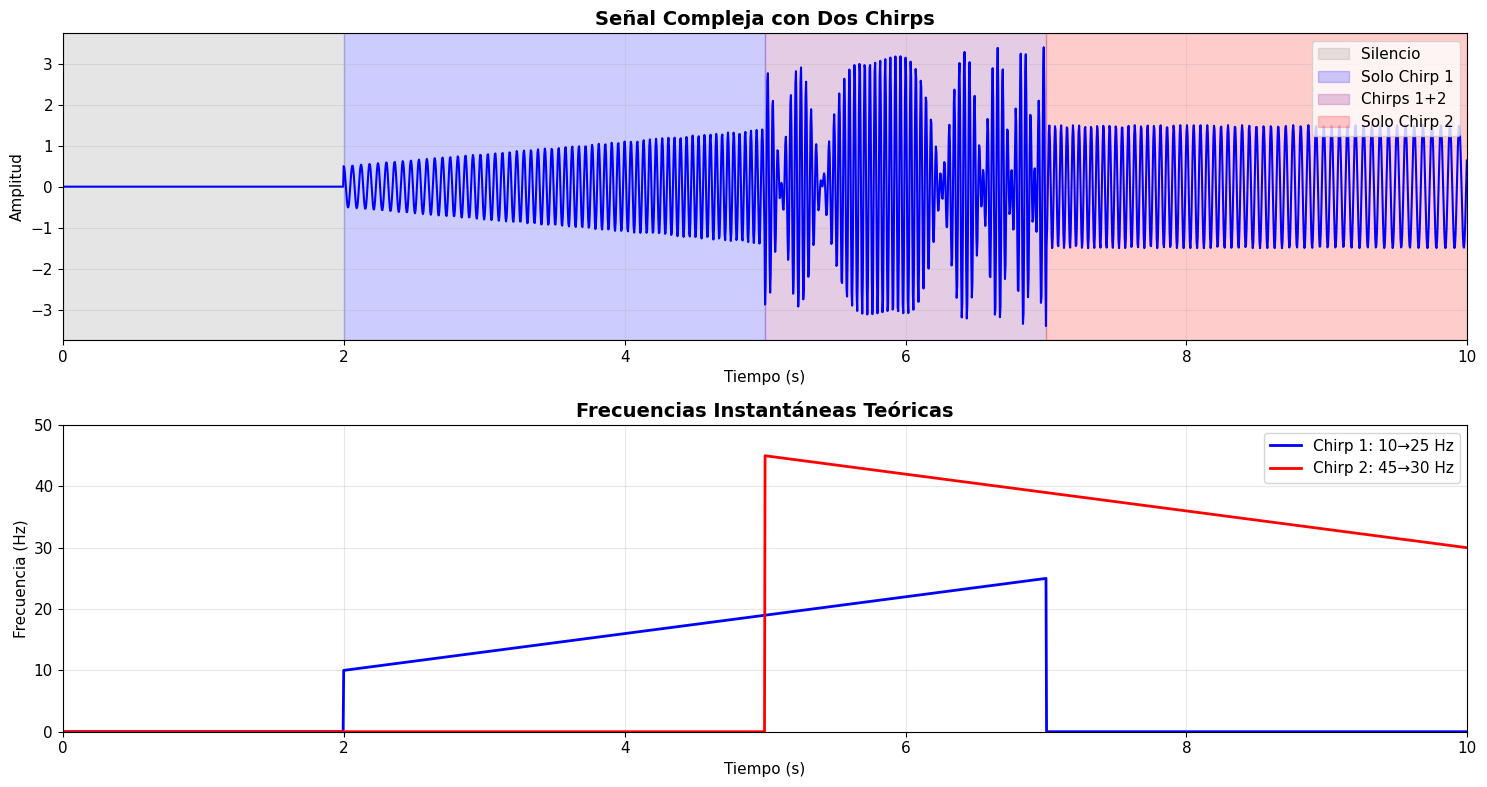

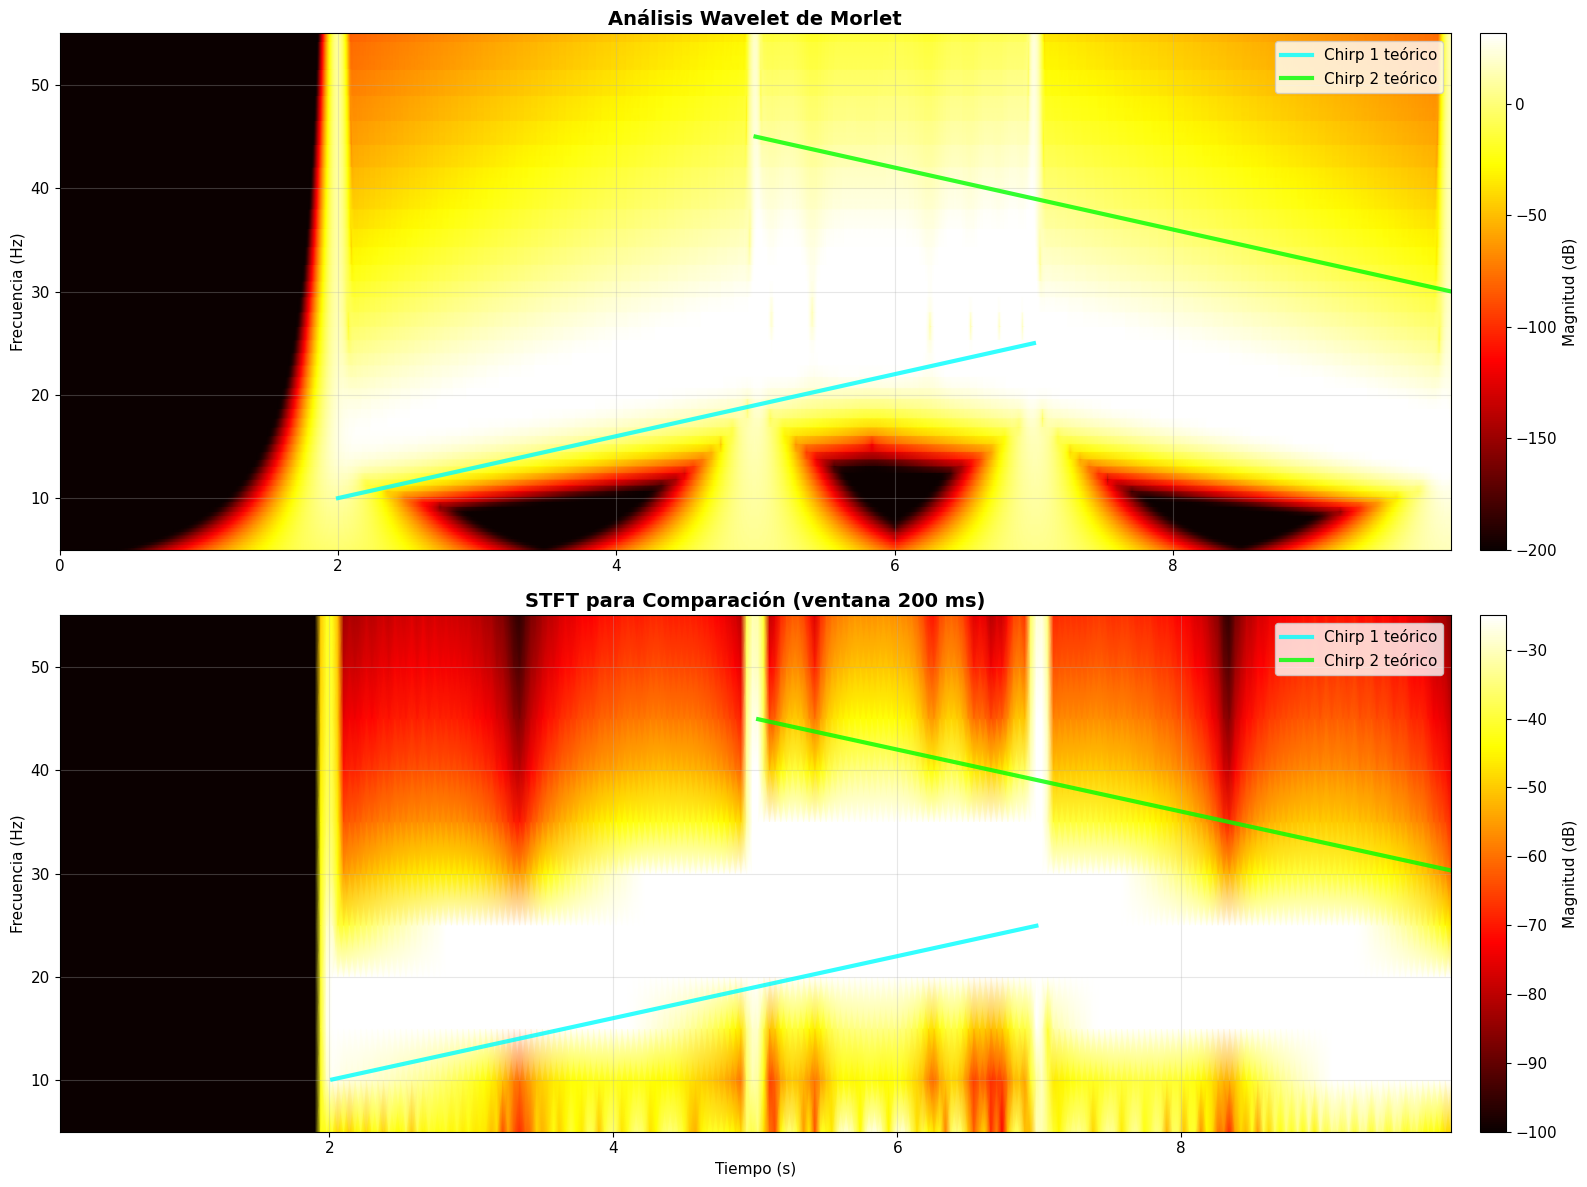


ANÁLISIS DE VENTAJAS DE LAS WAVELETS DE MORLET

1. RESOLUCIÓN ADAPTATIVA:
   • BAJAS FRECUENCIAS (10-25 Hz):
     10 Hz: Res. temp ≈ 262 ms, Res. freq ≈ 1.4 Hz
     25 Hz: Res. temp ≈ 105 ms, Res. freq ≈ 3.6 Hz
     30 Hz: Res. temp ≈ 87 ms, Res. freq ≈ 4.3 Hz
     45 Hz: Res. temp ≈ 58 ms, Res. freq ≈ 6.4 Hz

   • ALTAS FRECUENCIAS (30-45 Hz):
     Mejor resolución temporal, adecuada para cambios rápidos
     Resolución frecuencial suficiente para distinguir componentes

2. CAPACIDAD DE SUPERPOSICIÓN:
   • Período 5-7 segundos: ambos chirps presentes simultáneamente
   • Wavelets pueden separar componentes frecuenciales superpuestas
   • STFT con ventana fija tiene dificultades con esto

3. SEGUIMIENTO DE FRECUENCIA VARIABLE:
   • Chirp 1: incremento lineal de frecuencia
   • Chirp 2: decremento lineal de frecuencia
   • Wavelets siguen mejor las trayectorias curvilíneas

4. MÉTRICAS DE CALIDAD:
   Chirp 1:
     Error RMS: 5.68 Hz
     Correlación: 0.967
   Chirp 2:
     Error RMS: 1

In [14]:
#@title Codigo Ejercicio 5
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import chirp
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 11

def morlet_wavelet(t, freq_central, n_ciclos):
    """
    Genera una wavelet de Morlet compleja

    Parámetros:
    - t: vector de tiempo
    - freq_central: frecuencia central de la wavelet
    - n_ciclos: número de ciclos (controla el ancho temporal)
    """
    # Parámetro sigma basado en el número de ciclos
    sigma = n_ciclos / (2 * np.pi * freq_central)

    # Wavelet de Morlet compleja
    wavelet = (1 / np.sqrt(sigma * np.sqrt(np.pi))) * \
              np.exp(2j * np.pi * freq_central * t) * \
              np.exp(-t**2 / (2 * sigma**2))

    return wavelet

def cwt_morlet(senal, fs, frecuencias, n_ciclos):
    """
    Implementa la Transformada Wavelet Continua (CWT) con wavelets de Morlet

    Parámetros:
    - senal: señal de entrada
    - fs: frecuencia de muestreo
    - frecuencias: array de frecuencias a analizar
    - n_ciclos: número de ciclos para las wavelets
    """
    n_puntos = len(senal)
    n_frecuencias = len(frecuencias)

    # Matriz resultado
    cwt_matrix = np.zeros((n_frecuencias, n_puntos), dtype=complex)

    # Vector de tiempo centrado
    t_max = n_puntos / (2 * fs)
    t = np.linspace(-t_max, t_max, n_puntos)

    print(f"Calculando CWT para {n_frecuencias} frecuencias...")

    for i, freq in enumerate(frecuencias):
        if i % 10 == 0:
            print(f"  Procesando frecuencia {i+1}/{n_frecuencias}: {freq:.1f} Hz")

        # Generar wavelet de Morlet para esta frecuencia
        wavelet = morlet_wavelet(t, freq, n_ciclos)

        # Convolución (implementada como correlación cruzada)
        cwt_matrix[i, :] = np.convolve(senal, np.conj(wavelet[::-1]), mode='same')

    return cwt_matrix

def generar_senal_compleja(duracion=10, fs=250):
    """
    Genera la señal con los dos chirps especificados
    """
    t = np.linspace(0, duracion, int(fs * duracion), endpoint=False)
    senal = np.zeros_like(t)

    # Chirp 1: 2-7 segundos, 10-25 Hz, amplitud creciente
    mask1 = (t >= 2) & (t <= 7)
    t1 = t[mask1]

    if len(t1) > 0:
        # Frecuencia: 10 Hz a 25 Hz linealmente
        freq1_inicial = 10
        freq1_final = 25
        chirp1 = chirp(t1, freq1_inicial, t1[-1] - t1[0], freq1_final, method='linear')

        # Amplitud creciente linealmente de 0.5 a 2.0
        amplitud1 = np.linspace(0.5, 2.0, len(t1))
        chirp1 *= amplitud1

        senal[mask1] = chirp1

    # Chirp 2: 5-10 segundos, 45-30 Hz (decrementando)
    mask2 = (t >= 5) & (t <= 10)
    t2 = t[mask2]

    if len(t2) > 0:
        # Frecuencia: 45 Hz a 30 Hz (decrementando)
        freq2_inicial = 45
        freq2_final = 30
        chirp2 = chirp(t2, freq2_inicial, t2[-1] - t2[0], freq2_final, method='linear')

        # Amplitud constante
        amplitud2 = 1.5
        chirp2 *= amplitud2

        # Sumar al chirp 1 donde se superponen (5-7 segundos)
        senal[mask2] += chirp2

    return t, senal

def calcular_frecuencias_instantaneas(t):
    """
    Calcula las frecuencias instantáneas teóricas para ambos chirps
    """
    freq_inst_1 = np.zeros_like(t)
    freq_inst_2 = np.zeros_like(t)

    # Chirp 1: 2-7 segundos, 10-25 Hz
    mask1 = (t >= 2) & (t <= 7)
    if np.any(mask1):
        t1_norm = (t[mask1] - 2) / (7 - 2)  # Normalizar a [0,1]
        freq_inst_1[mask1] = 10 + (25 - 10) * t1_norm

    # Chirp 2: 5-10 segundos, 45-30 Hz
    mask2 = (t >= 5) & (t <= 10)
    if np.any(mask2):
        t2_norm = (t[mask2] - 5) / (10 - 5)  # Normalizar a [0,1]
        freq_inst_2[mask2] = 45 + (30 - 45) * t2_norm  # 45 - 15*t_norm

    return freq_inst_1, freq_inst_2

def justificar_parametros():
    """
    Explica la justificación para la selección de parámetros
    """
    print("="*80)
    print("JUSTIFICACIÓN DE PARÁMETROS PARA WAVELETS DE MORLET")
    print("="*80)

    print("\n1. SELECCIÓN DE FRECUENCIAS:")
    print("   • Chirp 1: 10-25 Hz → necesitamos cobertura desde ~8 Hz")
    print("   • Chirp 2: 45-30 Hz → necesitamos cobertura hasta ~50 Hz")
    print("   • Rango total recomendado: 5-60 Hz")
    print("   • Distribución: escala logarítmica para mejor resolución en bajas frecuencias")
    print("   • Justificación: las wavelets funcionan mejor con escalas logarítmicas")

    print("\n2. NÚMERO DE CICLOS:")
    print("   • Compromiso fundamental: resolución temporal vs frecuencial")
    print("   • Pocas ciclos (3-5): mejor resolución temporal, peor frecuencial")
    print("   • Muchos ciclos (10-15): mejor resolución frecuencial, peor temporal")
    print("   • Para este ejercicio: 6-8 ciclos como compromiso")
    print("   • Consideraciones específicas:")
    print("     - Chirps cambian relativamente lento → podemos usar más ciclos")
    print("     - Necesitamos distinguir 10-25 Hz y 30-45 Hz → buena res. frecuencial")
    print("     - Overlap de 5-7 segundos → necesitamos res. temporal decente")

    print("\n3. FRECUENCIA DE MUESTREO:")
    print("   • fs = 250 Hz (aumentada de 100 Hz)")
    print("   • Criterio de Nyquist: fs > 2 × freq_max = 2 × 50 = 100 Hz")
    print("   • Factor de seguridad 2.5x para mejor resolución temporal")
    print("   • Permite análisis más preciso de wavelets de alta frecuencia")

def comparar_con_stft(t, senal, fs):
    """
    Compara el análisis wavelet con STFT para mostrar ventajas
    """
    print("\n4. COMPARACIÓN WAVELET vs STFT:")

    # Calcular STFT con ventana fija
    ventana_ms = 200  # ms
    ventana_muestras = int(ventana_ms * fs / 1000)
    traslape = int(0.8 * ventana_muestras)

    freqs_stft, tiempos_stft, Zxx = signal.spectrogram(
        senal, fs,
        window='hann',
        nperseg=ventana_muestras,
        noverlap=traslape,
        return_onesided=True
    )

    Zxx_db = 10 * np.log10(np.abs(Zxx) + 1e-10)

    print(f"   • STFT usa ventana fija de {ventana_ms} ms")
    print(f"   • Resolución frecuencial constante: {fs/ventana_muestras:.1f} Hz")
    print(f"   • Resolución temporal constante: ~{ventana_ms*(1-0.8):.0f} ms")
    print(f"   • WAVELETS usan ventana adaptativa:")
    print(f"     - Altas frecuencias: ventana corta (mejor res. temporal)")
    print(f"     - Bajas frecuencias: ventana larga (mejor res. frecuencial)")
    print(f"   • Esto es ideal para señales con contenido multi-frecuencial")

    return freqs_stft, tiempos_stft, Zxx_db

def analisis_completo():
    """
    Realiza el análisis completo con wavelets de Morlet
    """
    print("="*80)
    print("ANÁLISIS TIEMPO-FRECUENCIA CON WAVELETS DE MORLET")
    print("="*80)

    # Parámetros
    duracion = 10  # segundos
    fs = 250  # Hz (aumentado para mejor resolución)

    # Generar señal
    print(f"\nGenerando señal compleja:")
    print(f"  Duración: {duracion} segundos")
    print(f"  Frecuencia de muestreo: {fs} Hz")
    print(f"  Chirp 1: 2-7s, 10-25 Hz, amplitud creciente")
    print(f"  Chirp 2: 5-10s, 45-30 Hz, amplitud constante")

    t, senal = generar_senal_compleja(duracion, fs)
    freq_inst_1, freq_inst_2 = calcular_frecuencias_instantaneas(t)

    # Justificar parámetros
    justificar_parametros()

    # Definir parámetros para wavelets
    freq_min = 5   # Hz
    freq_max = 60  # Hz
    n_frecuencias = 50
    n_ciclos = 7  # Compromiso entre resolución temporal y frecuencial

    # Crear escala logarítmica de frecuencias
    frecuencias = np.logspace(np.log10(freq_min), np.log10(freq_max), n_frecuencias)

    print(f"\nParámetros de análisis wavelet:")
    print(f"  Frecuencias: {freq_min}-{freq_max} Hz ({n_frecuencias} puntos)")
    print(f"  Número de ciclos: {n_ciclos}")
    print(f"  Distribución: logarítmica")

    # Calcular CWT
    print(f"\nCalculando Transformada Wavelet Continua...")
    cwt_matrix = cwt_morlet(senal, fs, frecuencias, n_ciclos)

    # Convertir a magnitud en dB
    cwt_magnitude = np.abs(cwt_matrix)
    cwt_db = 20 * np.log10(cwt_magnitude + 1e-10)

    # Comparar con STFT
    freqs_stft, tiempos_stft, stft_db = comparar_con_stft(t, senal, fs)

    return t, senal, freq_inst_1, freq_inst_2, frecuencias, cwt_db, freqs_stft, tiempos_stft, stft_db

def graficar_resultados(t, senal, freq_inst_1, freq_inst_2, frecuencias, cwt_db,
                       freqs_stft, tiempos_stft, stft_db):
    """
    Genera todas las gráficas del análisis
    """
    # Figura 1: Señal en el tiempo
    fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

    # Señal completa
    ax1.plot(t, senal, 'b-', linewidth=1.5)
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Amplitud')
    ax1.set_title('Señal Compleja con Dos Chirps', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 10)

    # Añadir regiones coloreadas
    ax1.axvspan(0, 2, alpha=0.2, color='gray', label='Silencio')
    ax1.axvspan(2, 5, alpha=0.2, color='blue', label='Solo Chirp 1')
    ax1.axvspan(5, 7, alpha=0.2, color='purple', label='Chirps 1+2')
    ax1.axvspan(7, 10, alpha=0.2, color='red', label='Solo Chirp 2')
    ax1.legend(loc='upper right')

    # Frecuencias instantáneas teóricas
    ax2.plot(t, freq_inst_1, 'b-', linewidth=2, label='Chirp 1: 10→25 Hz')
    ax2.plot(t, freq_inst_2, 'r-', linewidth=2, label='Chirp 2: 45→30 Hz')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Frecuencia (Hz)')
    ax2.set_title('Frecuencias Instantáneas Teóricas', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 50)

    plt.tight_layout()
    plt.show()

    # Figura 2: Comparación Wavelet vs STFT
    fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

    # Espectrograma Wavelet
    im1 = ax1.pcolormesh(t, frecuencias, cwt_db, shading='gouraud',
                         cmap='hot', vmin=np.percentile(cwt_db, 10),
                         vmax=np.percentile(cwt_db, 90))

    # Sobreponer frecuencias teóricas
    mask1 = freq_inst_1 > 0
    mask2 = freq_inst_2 > 0
    ax1.plot(t[mask1], freq_inst_1[mask1], 'cyan', linewidth=3,
             label='Chirp 1 teórico', alpha=0.8)
    ax1.plot(t[mask2], freq_inst_2[mask2], 'lime', linewidth=3,
             label='Chirp 2 teórico', alpha=0.8)

    ax1.set_ylabel('Frecuencia (Hz)')
    ax1.set_title('Análisis Wavelet de Morlet', fontsize=14, fontweight='bold')
    ax1.legend(loc='upper right')
    ax1.set_ylim(5, 55)
    ax1.grid(True, alpha=0.3)

    # Espectrograma STFT
    im2 = ax2.pcolormesh(tiempos_stft, freqs_stft, stft_db, shading='gouraud',
                         cmap='hot', vmin=np.percentile(stft_db, 10),
                         vmax=np.percentile(stft_db, 90))

    # Sobreponer frecuencias teóricas (interpoladas)
    t_interp = tiempos_stft
    freq1_interp = np.interp(t_interp, t, freq_inst_1)
    freq2_interp = np.interp(t_interp, t, freq_inst_2)

    mask1_interp = freq1_interp > 0
    mask2_interp = freq2_interp > 0
    ax2.plot(t_interp[mask1_interp], freq1_interp[mask1_interp], 'cyan',
             linewidth=3, label='Chirp 1 teórico', alpha=0.8)
    ax2.plot(t_interp[mask2_interp], freq2_interp[mask2_interp], 'lime',
             linewidth=3, label='Chirp 2 teórico', alpha=0.8)

    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Frecuencia (Hz)')
    ax2.set_title('STFT para Comparación (ventana 200 ms)', fontsize=14, fontweight='bold')
    ax2.legend(loc='upper right')
    ax2.set_ylim(5, 55)
    ax2.grid(True, alpha=0.3)

    # Barras de color
    fig2.colorbar(im1, ax=ax1, orientation='vertical', fraction=0.02, pad=0.02, label='Magnitud (dB)')
    fig2.colorbar(im2, ax=ax2, orientation='vertical', fraction=0.02, pad=0.02, label='Magnitud (dB)')

    plt.tight_layout()
    plt.show()

def analizar_ventajas_wavelets(t, frecuencias, cwt_db, freq_inst_1, freq_inst_2):
    """
    Analiza las ventajas específicas del análisis wavelet
    """
    print("\n" + "="*80)
    print("ANÁLISIS DE VENTAJAS DE LAS WAVELETS DE MORLET")
    print("="*80)

    print("\n1. RESOLUCIÓN ADAPTATIVA:")
    print("   • BAJAS FRECUENCIAS (10-25 Hz):")

    # Calcular resolución temporal y frecuencial aproximadas
    for i, freq in enumerate([10, 25, 30, 45]):
        if freq in [10, 25]:
            categoria = "BAJA"
        else:
            categoria = "ALTA"

        # Resolución temporal: σt ≈ n_ciclos / (2π × freq)
        sigma_t = 7 / (2 * np.pi * freq)
        res_temporal_ms = sigma_t * 1000 * 2.35  # FWHM en ms

        # Resolución frecuencial: σf ≈ freq / n_ciclos
        res_frecuencial = freq / 7

        print(f"     {freq} Hz: Res. temp ≈ {res_temporal_ms:.0f} ms, "
              f"Res. freq ≈ {res_frecuencial:.1f} Hz")

    print("\n   • ALTAS FRECUENCIAS (30-45 Hz):")
    print("     Mejor resolución temporal, adecuada para cambios rápidos")
    print("     Resolución frecuencial suficiente para distinguir componentes")

    print("\n2. CAPACIDAD DE SUPERPOSICIÓN:")
    print("   • Período 5-7 segundos: ambos chirps presentes simultáneamente")
    print("   • Wavelets pueden separar componentes frecuenciales superpuestas")
    print("   • STFT con ventana fija tiene dificultades con esto")

    print("\n3. SEGUIMIENTO DE FRECUENCIA VARIABLE:")
    print("   • Chirp 1: incremento lineal de frecuencia")
    print("   • Chirp 2: decremento lineal de frecuencia")
    print("   • Wavelets siguen mejor las trayectorias curvilíneas")

    # Calcular correlación entre wavelets y frecuencias teóricas
    print("\n4. MÉTRICAS DE CALIDAD:")

    for chirp_num, freq_inst in enumerate([freq_inst_1, freq_inst_2], 1):
        if np.any(freq_inst > 0):
            # Encontrar tiempos donde existe este chirp
            indices_activos = np.where(freq_inst > 0)[0]

            # Para cada tiempo, encontrar la frecuencia de máxima energía
            energias_maximas = []
            frecuencias_detectadas = []

            for idx in indices_activos[::10]:  # Submuestrear para eficiencia
                columna_energia = cwt_db[:, idx]
                idx_max = np.argmax(columna_energia)
                freq_detectada = frecuencias[idx_max]
                energia_max = columna_energia[idx_max]

                frecuencias_detectadas.append(freq_detectada)
                energias_maximas.append(energia_max)

            if frecuencias_detectadas:
                freq_teoricas_sub = freq_inst[indices_activos[::10]]
                frecuencias_detectadas = np.array(frecuencias_detectadas)

                # Calcular error RMS
                error_rms = np.sqrt(np.mean((frecuencias_detectadas - freq_teoricas_sub)**2))

                # Calcular correlación
                if len(frecuencias_detectadas) > 1:
                    correlacion = np.corrcoef(frecuencias_detectadas, freq_teoricas_sub)[0, 1]
                else:
                    correlacion = np.nan

                print(f"   Chirp {chirp_num}:")
                print(f"     Error RMS: {error_rms:.2f} Hz")
                print(f"     Correlación: {correlacion:.3f}")

def conclusiones_ejercicio():
    """
    Presenta las conclusiones del ejercicio
    """
    print("\n" + "="*80)
    print("CONCLUSIONES Y APRENDIZAJES")
    print("="*80)

    print("""
1. VENTAJAS DE WAVELETS DE MORLET:
   • Resolución tiempo-frecuencia adaptativa
   • Mejor seguimiento de frecuencias variables
   • Capacidad superior para señales superpuestas
   • Análisis más natural para señales no-estacionarias

2. SELECCIÓN ÓPTIMA DE PARÁMETROS:
   • Frecuencias: escala logarítmica 5-60 Hz
   • Número de ciclos: 6-8 (compromiso temporal/frecuencial)
   • Frecuencia de muestreo: 2.5x criterio de Nyquist

3. APLICACIONES IDEALES:
   • Señales biomédicas (EEG, EMG)
   • Análisis de música y habla
   • Señales sísmicas y vibraciones
   • Cualquier señal con contenido frecuencial variable

4. LIMITACIONES:
   • Computacionalmente más costoso que STFT
   • Requiere selección cuidadosa de parámetros
   • Interpretación más compleja que STFT

5. COMPARACIÓN CON STFT:
   • STFT: ventana fija, resolución constante
   • Wavelets: ventana adaptativa, resolución variable
   • Wavelets superiores para señales complejas tiempo-frecuencia
""")

def main():
    """
    Función principal
    """
    print("Iniciando análisis con Wavelets de Morlet...")

    # Realizar análisis completo
    resultados = analisis_completo()
    t, senal, freq_inst_1, freq_inst_2, frecuencias, cwt_db, freqs_stft, tiempos_stft, stft_db = resultados

    # Generar gráficas
    print(f"\nGenerando visualizaciones...")
    graficar_resultados(t, senal, freq_inst_1, freq_inst_2, frecuencias, cwt_db,
                       freqs_stft, tiempos_stft, stft_db)

    # Analizar ventajas
    analizar_ventajas_wavelets(t, frecuencias, cwt_db, freq_inst_1, freq_inst_2)

    # Conclusiones
    conclusiones_ejercicio()

    print("\n" + "="*80)
    print("ANÁLISIS COMPLETADO")
    print("="*80)

# Ejecutar análisis
if __name__ == "__main__":
    main()

# Ejercicio 6
6. (0.7-0.9 puntos) Construya una se ̃nal como la del ejercicio anterior, pero esta vez sume
ruido rosa (ruido con dependencia 1/f). La amplitud m ́axima del ruido deber ́ıa ser del
doble de la se ̃nal sin ruido. Posteriormente realice un an ́alisis de tiempo frecuencia y
responda las siguientes preguntas:
¿A qu ́e frecuencias afecta m ́as el ruido?
¿Es posible distinguir las caracter ́ısticas de la se ̃nal de forma sencilla como antes?

Iniciando análisis con ruido rosa...
ANÁLISIS TIEMPO-FRECUENCIA CON RUIDO ROSA

Generando señal limpia...
Generando ruido rosa...
  Amplitud máxima señal limpia: 3.399
  Amplitud máxima ruido rosa: 6.798
  Relación ruido/señal: 2.0x

Calculando CWT para señal limpia...
  Procesando frecuencia 1/50: 5.0 Hz
  Procesando frecuencia 11/50: 8.3 Hz
  Procesando frecuencia 21/50: 13.8 Hz
  Procesando frecuencia 31/50: 22.9 Hz
  Procesando frecuencia 41/50: 38.0 Hz
Calculando CWT para señal con ruido...
  Procesando frecuencia 1/50: 5.0 Hz
  Procesando frecuencia 11/50: 8.3 Hz
  Procesando frecuencia 21/50: 13.8 Hz
  Procesando frecuencia 31/50: 22.9 Hz
  Procesando frecuencia 41/50: 38.0 Hz

Calculando SNR por bandas de frecuencia...

Generando visualizaciones...


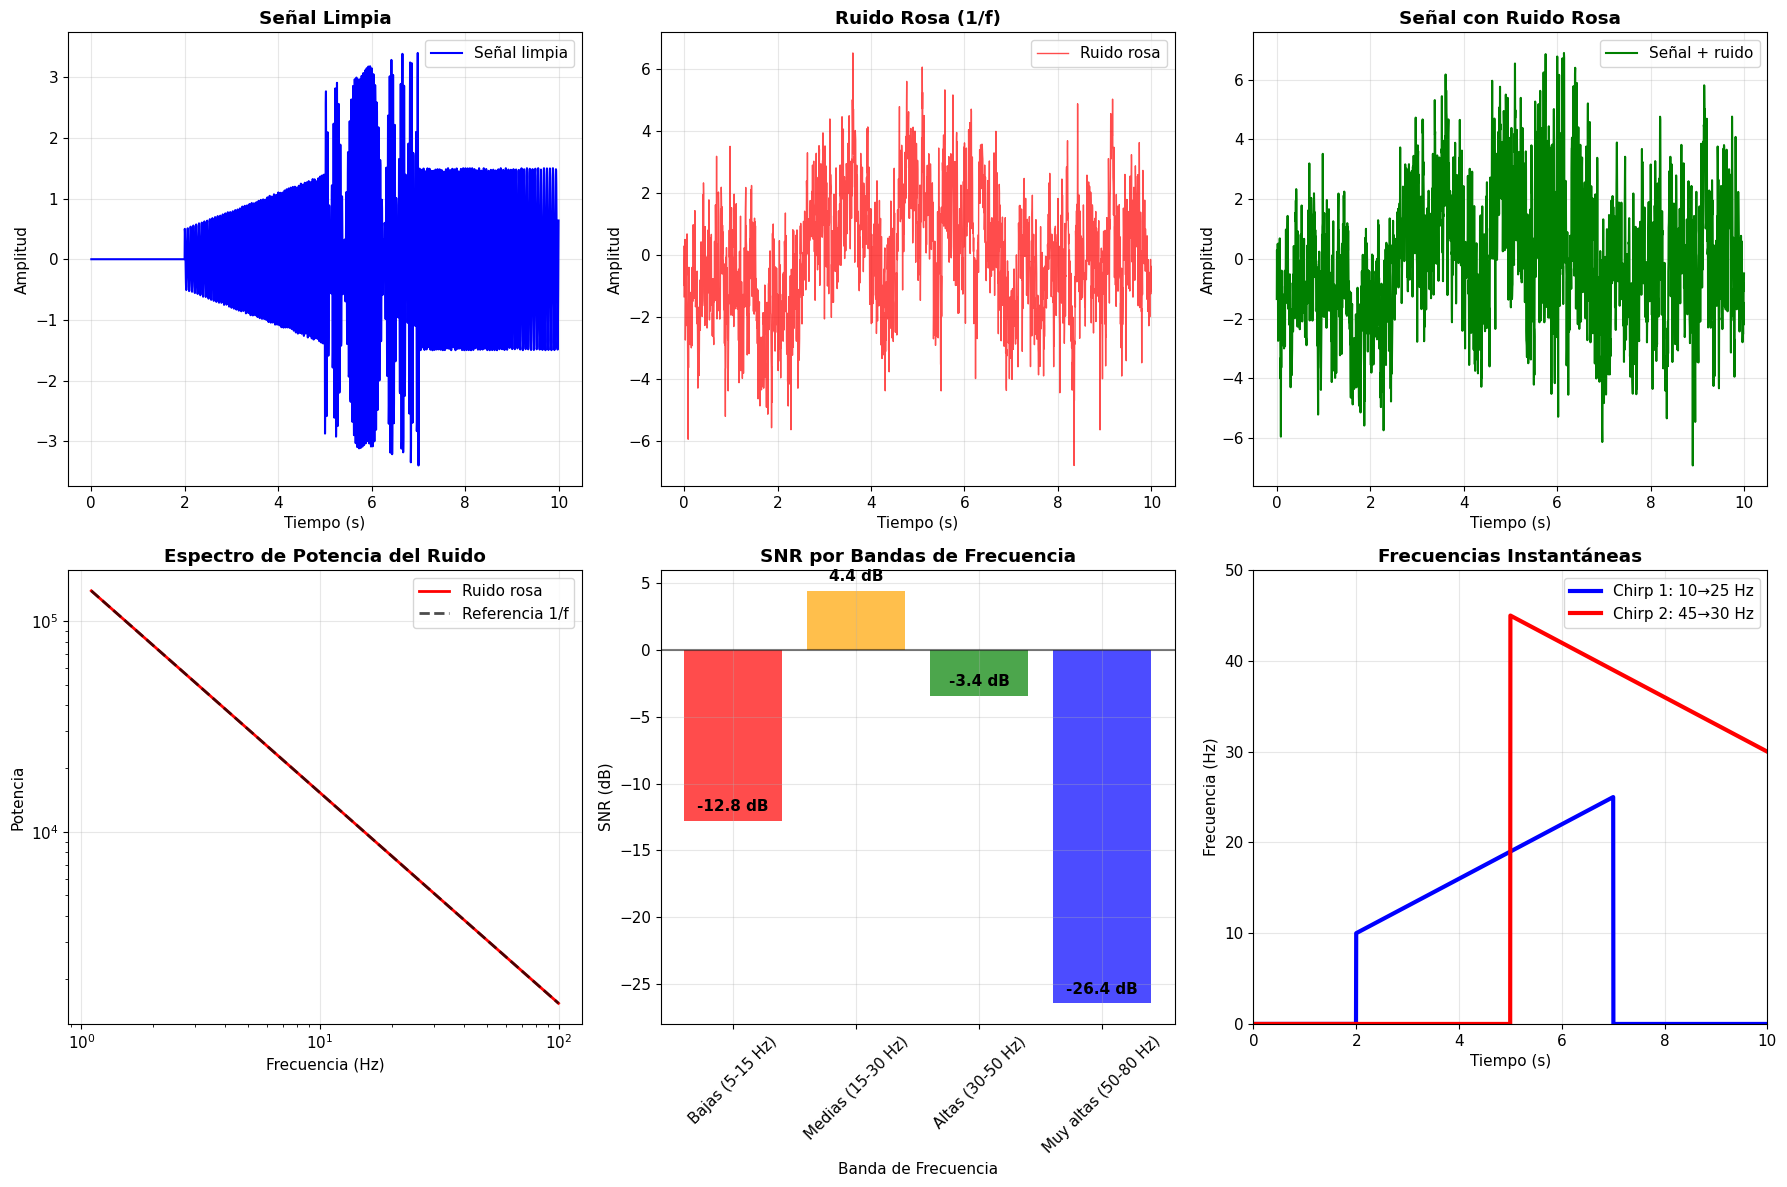

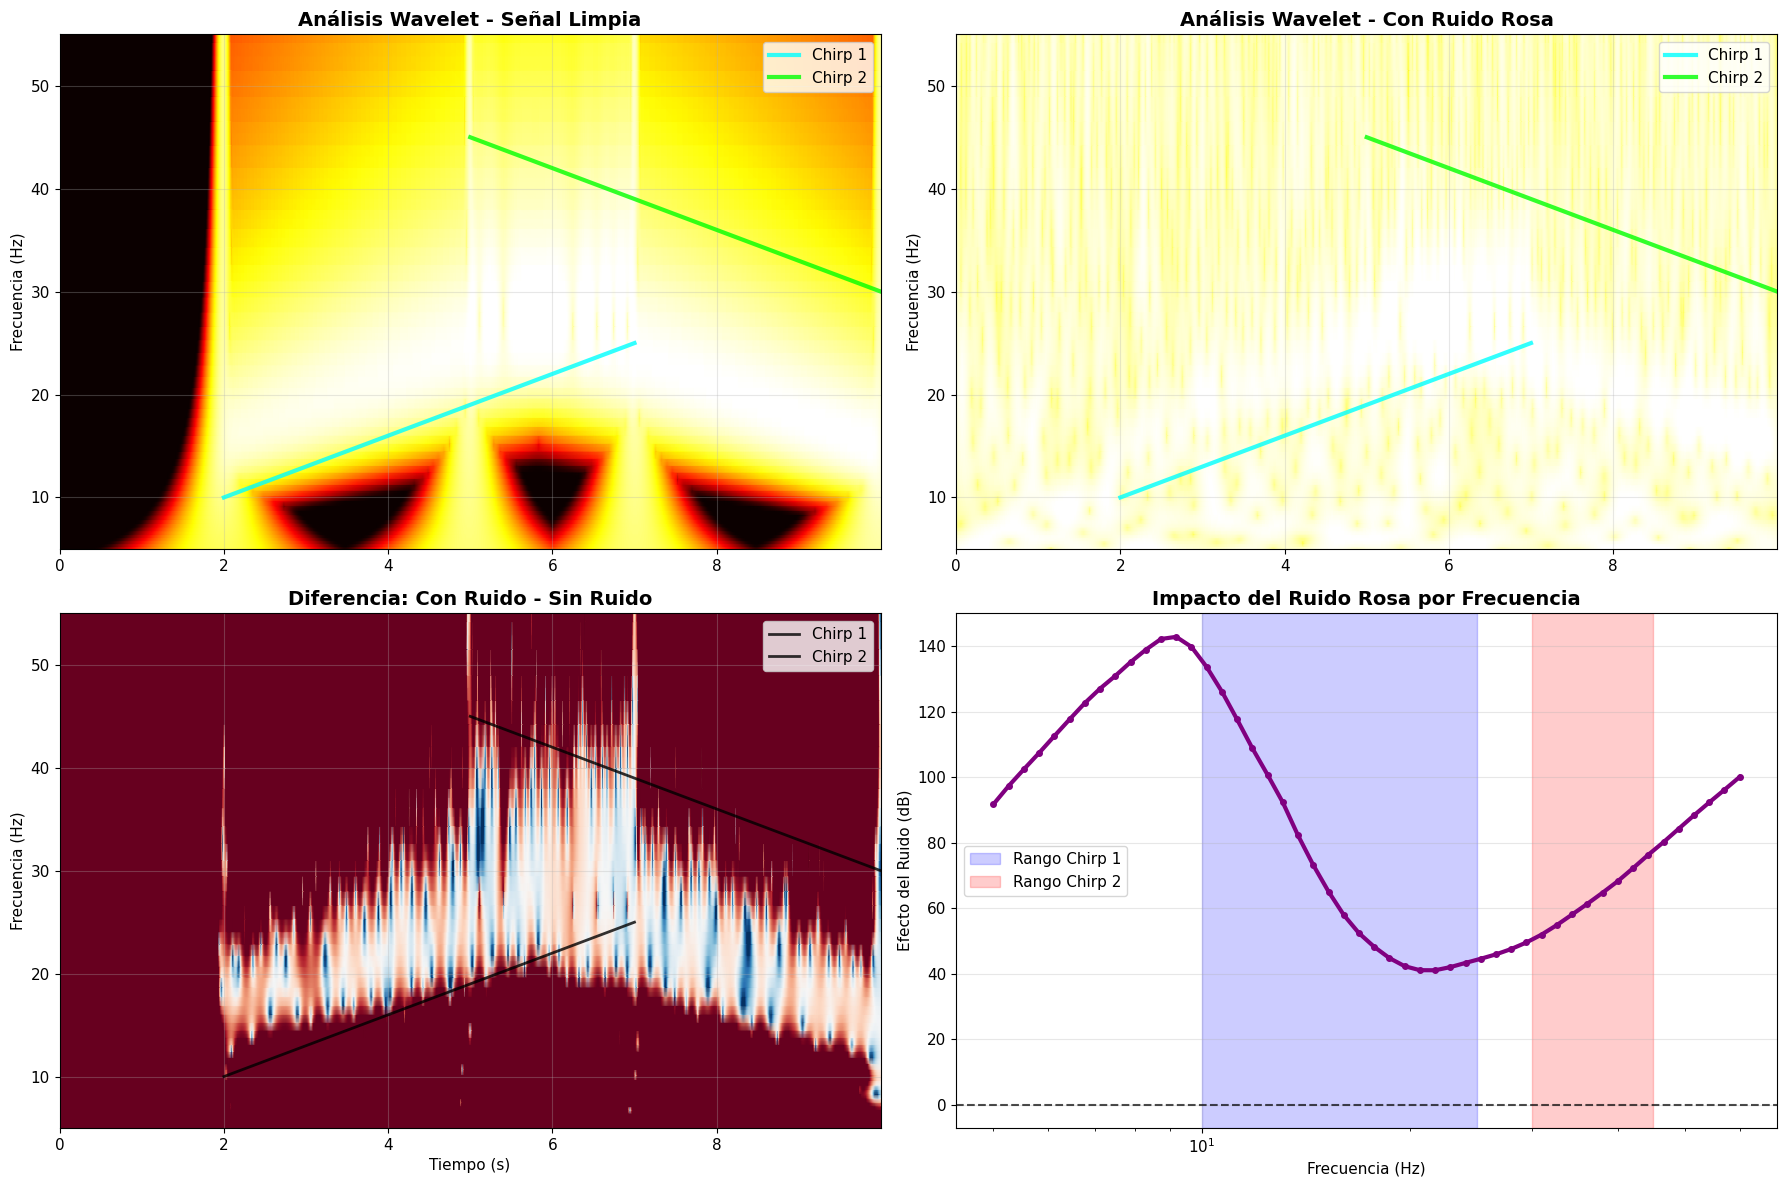


RESPUESTAS A LAS PREGUNTAS DEL EJERCICIO

1. ¿A QUÉ FRECUENCIAS AFECTA MÁS EL RUIDO?
--------------------------------------------------
Análisis por bandas de frecuencia:
  Bajas (5-15 Hz): SNR = -12.8 dB → MUY ALTO impacto
  Medias (15-30 Hz): SNR = 4.4 dB → ALTO impacto
  Altas (30-50 Hz): SNR = -3.4 dB → MUY ALTO impacto
  Muy altas (50-80 Hz): SNR = -26.4 dB → MUY ALTO impacto

CONCLUSIÓN:
• La banda MÁS AFECTADA es: Muy altas (50-80 Hz) (SNR = -26.4 dB)
• Esto confirma la característica 1/f del ruido rosa:
  - Mayor energía en frecuencias BAJAS
  - Menor energía en frecuencias ALTAS
• El Chirp 1 (10-25 Hz) está más afectado que el Chirp 2 (30-45 Hz)

2. ¿ES POSIBLE DISTINGUIR LAS CARACTERÍSTICAS DE LA SEÑAL?
------------------------------------------------------------

ANÁLISIS DE DETECTABILIDAD DE CHIRPS

CHIRP 1:
  Detectabilidad promedio (señal limpia): -0.007
  Detectabilidad promedio (con ruido): 0.034
  Degradación: 548.6%

CHIRP 2:
  Detectabilidad promedio (señal limpia):

In [16]:
#@title Codigo Ejercicio 6
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import chirp
from scipy.fft import fft, ifft, fftfreq
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 11

def generar_ruido_rosa(n_muestras, fs):
    """
    Genera ruido rosa (ruido 1/f) usando el método espectral

    El ruido rosa tiene potencia espectral proporcional a 1/f
    """
    # Generar ruido blanco en el dominio de la frecuencia
    freqs = fftfreq(n_muestras, 1/fs)

    # Evitar división por cero en f=0
    freqs[0] = 1e-10

    # Crear espectro 1/f (solo para frecuencias positivas)
    espectro = np.zeros(n_muestras, dtype=complex)

    # Frecuencias positivas
    n_pos = n_muestras // 2

    # Generar fases aleatorias
    fases_aleatorias = np.random.uniform(0, 2*np.pi, n_pos)

    # Crear espectro 1/sqrt(f) para obtener potencia 1/f
    for i in range(1, n_pos):
        magnitud = 1 / np.sqrt(abs(freqs[i]))
        espectro[i] = magnitud * np.exp(1j * fases_aleatorias[i])
        # Simetría hermitiana para obtener señal real
        if n_muestras % 2 == 0 and i < n_muestras - i:
            espectro[n_muestras - i] = np.conj(espectro[i])
        elif n_muestras % 2 == 1 and i < n_muestras - i:
            espectro[n_muestras - i] = np.conj(espectro[i])

    # Transformada inversa para obtener señal temporal
    ruido_rosa = np.real(ifft(espectro))

    return ruido_rosa

def morlet_wavelet(t, freq_central, n_ciclos):
    """
    Genera una wavelet de Morlet compleja
    """
    sigma = n_ciclos / (2 * np.pi * freq_central)
    wavelet = (1 / np.sqrt(sigma * np.sqrt(np.pi))) * \
              np.exp(2j * np.pi * freq_central * t) * \
              np.exp(-t**2 / (2 * sigma**2))
    return wavelet

def cwt_morlet(senal, fs, frecuencias, n_ciclos):
    """
    Implementa la Transformada Wavelet Continua (CWT) con wavelets de Morlet
    """
    n_puntos = len(senal)
    n_frecuencias = len(frecuencias)
    cwt_matrix = np.zeros((n_frecuencias, n_puntos), dtype=complex)

    t_max = n_puntos / (2 * fs)
    t = np.linspace(-t_max, t_max, n_puntos)

    for i, freq in enumerate(frecuencias):
        if i % 10 == 0:
            print(f"  Procesando frecuencia {i+1}/{n_frecuencias}: {freq:.1f} Hz")

        wavelet = morlet_wavelet(t, freq, n_ciclos)
        cwt_matrix[i, :] = np.convolve(senal, np.conj(wavelet[::-1]), mode='same')

    return cwt_matrix

def generar_senal_compleja(duracion=10, fs=250):
    """
    Genera la señal con los dos chirps (igual que el ejercicio anterior)
    """
    t = np.linspace(0, duracion, int(fs * duracion), endpoint=False)
    senal = np.zeros_like(t)

    # Chirp 1: 2-7 segundos, 10-25 Hz, amplitud creciente
    mask1 = (t >= 2) & (t <= 7)
    t1 = t[mask1]

    if len(t1) > 0:
        freq1_inicial = 10
        freq1_final = 25
        chirp1 = chirp(t1, freq1_inicial, t1[-1] - t1[0], freq1_final, method='linear')
        amplitud1 = np.linspace(0.5, 2.0, len(t1))
        chirp1 *= amplitud1
        senal[mask1] = chirp1

    # Chirp 2: 5-10 segundos, 45-30 Hz
    mask2 = (t >= 5) & (t <= 10)
    t2 = t[mask2]

    if len(t2) > 0:
        freq2_inicial = 45
        freq2_final = 30
        chirp2 = chirp(t2, freq2_inicial, t2[-1] - t2[0], freq2_final, method='linear')
        amplitud2 = 1.5
        chirp2 *= amplitud2
        senal[mask2] += chirp2

    return t, senal

def calcular_frecuencias_instantaneas(t):
    """
    Calcula las frecuencias instantáneas teóricas para ambos chirps
    """
    freq_inst_1 = np.zeros_like(t)
    freq_inst_2 = np.zeros_like(t)

    # Chirp 1: 2-7 segundos, 10-25 Hz
    mask1 = (t >= 2) & (t <= 7)
    if np.any(mask1):
        t1_norm = (t[mask1] - 2) / (7 - 2)
        freq_inst_1[mask1] = 10 + (25 - 10) * t1_norm

    # Chirp 2: 5-10 segundos, 45-30 Hz
    mask2 = (t >= 5) & (t <= 10)
    if np.any(mask2):
        t2_norm = (t[mask2] - 5) / (10 - 5)
        freq_inst_2[mask2] = 45 + (30 - 45) * t2_norm

    return freq_inst_1, freq_inst_2

def analizar_espectro_ruido(ruido_rosa, fs):
    """
    Analiza el espectro del ruido rosa para confirmar la característica 1/f
    """
    # Calcular espectro de potencia
    freqs = fftfreq(len(ruido_rosa), 1/fs)
    fft_ruido = fft(ruido_rosa)
    potencia = np.abs(fft_ruido)**2

    # Solo frecuencias positivas
    idx_pos = freqs > 0
    freqs_pos = freqs[idx_pos]
    potencia_pos = potencia[idx_pos]

    return freqs_pos, potencia_pos

def calcular_snr_por_frecuencia(senal_limpia, senal_ruidosa, fs, frecuencias_analisis):
    """
    Calcula la relación señal-ruido (SNR) para diferentes bandas de frecuencia
    """
    snr_bandas = []
    bandas_freq = []

    # Definir bandas de frecuencia para análisis
    bandas = [
        (5, 15, "Bajas (5-15 Hz)"),
        (15, 30, "Medias (15-30 Hz)"),
        (30, 50, "Altas (30-50 Hz)"),
        (50, 80, "Muy altas (50-80 Hz)")
    ]

    for f_min, f_max, nombre in bandas:
        # Filtrar señales en esta banda
        sos = signal.butter(4, [f_min, f_max], btype='band', fs=fs, output='sos')

        senal_filtrada_limpia = signal.sosfilt(sos, senal_limpia)
        senal_filtrada_ruidosa = signal.sosfilt(sos, senal_ruidosa)

        # Calcular ruido como la diferencia
        ruido_filtrado = senal_filtrada_ruidosa - senal_filtrada_limpia

        # Calcular potencias
        potencia_senal = np.mean(senal_filtrada_limpia**2)
        potencia_ruido = np.mean(ruido_filtrado**2)

        # SNR en dB
        if potencia_ruido > 0:
            snr_db = 10 * np.log10(potencia_senal / potencia_ruido)
        else:
            snr_db = np.inf

        snr_bandas.append(snr_db)
        bandas_freq.append(nombre)

    return bandas_freq, snr_bandas

def comparar_detectabilidad(cwt_limpia, cwt_ruidosa, frecuencias, t, freq_inst_1, freq_inst_2):
    """
    Compara la detectabilidad de los chirps con y sin ruido
    """
    print(f"\n" + "="*80)
    print("ANÁLISIS DE DETECTABILIDAD DE CHIRPS")
    print("="*80)

    # Convertir a magnitudes
    mag_limpia = np.abs(cwt_limpia)
    mag_ruidosa = np.abs(cwt_ruidosa)

    resultados = {}

    for chirp_num, freq_inst in enumerate([freq_inst_1, freq_inst_2], 1):
        if np.any(freq_inst > 0):
            print(f"\nCHIRP {chirp_num}:")

            # Encontrar tiempos activos
            indices_activos = np.where(freq_inst > 0)[0]

            # Submuestrear para eficiencia
            indices_sub = indices_activos[::20]

            correlaciones_limpia = []
            correlaciones_ruidosa = []

            for idx in indices_sub:
                freq_teorica = freq_inst[idx]

                # Encontrar frecuencia más cercana en el análisis
                idx_freq = np.argmin(np.abs(frecuencias - freq_teorica))

                # Extraer energía en esa frecuencia alrededor del tiempo
                ventana = slice(max(0, idx-10), min(len(t), idx+10))

                energia_limpia = mag_limpia[idx_freq, ventana]
                energia_ruidosa = mag_ruidosa[idx_freq, ventana]

                # Calcular correlación con patrón esperado (gaussiana)
                patron = np.exp(-0.5 * np.linspace(-2, 2, len(energia_limpia))**2)

                if len(energia_limpia) > 1:
                    corr_limpia = np.corrcoef(energia_limpia, patron)[0, 1]
                    corr_ruidosa = np.corrcoef(energia_ruidosa, patron)[0, 1]

                    if not np.isnan(corr_limpia):
                        correlaciones_limpia.append(corr_limpia)
                    if not np.isnan(corr_ruidosa):
                        correlaciones_ruidosa.append(corr_ruidosa)

            # Calcular métricas
            if correlaciones_limpia and correlaciones_ruidosa:
                media_limpia = np.mean(correlaciones_limpia)
                media_ruidosa = np.mean(correlaciones_ruidosa)
                degradacion = (media_limpia - media_ruidosa) / media_limpia * 100

                print(f"  Detectabilidad promedio (señal limpia): {media_limpia:.3f}")
                print(f"  Detectabilidad promedio (con ruido): {media_ruidosa:.3f}")
                print(f"  Degradación: {degradacion:.1f}%")

                resultados[f'chirp_{chirp_num}'] = {
                    'limpia': media_limpia,
                    'ruidosa': media_ruidosa,
                    'degradacion': degradacion
                }

    return resultados

def analisis_completo():
    """
    Realiza el análisis completo con ruido rosa
    """
    print("="*80)
    print("ANÁLISIS TIEMPO-FRECUENCIA CON RUIDO ROSA")
    print("="*80)

    # Parámetros
    duracion = 10
    fs = 250

    # Generar señal limpia
    print(f"\nGenerando señal limpia...")
    t, senal_limpia = generar_senal_compleja(duracion, fs)
    freq_inst_1, freq_inst_2 = calcular_frecuencias_instantaneas(t)

    # Generar ruido rosa
    print(f"Generando ruido rosa...")
    ruido_rosa = generar_ruido_rosa(len(t), fs)

    # Escalar ruido para que su amplitud máxima sea el doble de la señal
    amplitud_senal = np.max(np.abs(senal_limpia))
    amplitud_ruido_deseada = 2 * amplitud_senal
    factor_escalado = amplitud_ruido_deseada / np.max(np.abs(ruido_rosa))
    ruido_rosa_escalado = ruido_rosa * factor_escalado

    print(f"  Amplitud máxima señal limpia: {amplitud_senal:.3f}")
    print(f"  Amplitud máxima ruido rosa: {np.max(np.abs(ruido_rosa_escalado)):.3f}")
    print(f"  Relación ruido/señal: {np.max(np.abs(ruido_rosa_escalado))/amplitud_senal:.1f}x")

    # Señal con ruido
    senal_ruidosa = senal_limpia + ruido_rosa_escalado

    # Analizar espectro del ruido
    freqs_ruido, potencia_ruido = analizar_espectro_ruido(ruido_rosa_escalado, fs)

    # Parámetros para wavelets
    freq_min = 5
    freq_max = 60
    n_frecuencias = 50
    n_ciclos = 7
    frecuencias = np.logspace(np.log10(freq_min), np.log10(freq_max), n_frecuencias)

    # Calcular CWT para ambas señales
    print(f"\nCalculando CWT para señal limpia...")
    cwt_limpia = cwt_morlet(senal_limpia, fs, frecuencias, n_ciclos)

    print(f"Calculando CWT para señal con ruido...")
    cwt_ruidosa = cwt_morlet(senal_ruidosa, fs, frecuencias, n_ciclos)

    # Convertir a dB
    cwt_limpia_db = 20 * np.log10(np.abs(cwt_limpia) + 1e-10)
    cwt_ruidosa_db = 20 * np.log10(np.abs(cwt_ruidosa) + 1e-10)

    # Analizar SNR por bandas de frecuencia
    print(f"\nCalculando SNR por bandas de frecuencia...")
    bandas_freq, snr_bandas = calcular_snr_por_frecuencia(senal_limpia, senal_ruidosa, fs, frecuencias)

    return (t, senal_limpia, senal_ruidosa, ruido_rosa_escalado, freq_inst_1, freq_inst_2,
            frecuencias, cwt_limpia_db, cwt_ruidosa_db, freqs_ruido, potencia_ruido,
            bandas_freq, snr_bandas, cwt_limpia, cwt_ruidosa)

def graficar_resultados_completos(t, senal_limpia, senal_ruidosa, ruido_rosa_escalado,
                                 freq_inst_1, freq_inst_2, frecuencias, cwt_limpia_db,
                                 cwt_ruidosa_db, freqs_ruido, potencia_ruido,
                                 bandas_freq, snr_bandas):
    """
    Genera todas las visualizaciones del análisis
    """
    # Figura 1: Señales temporales y espectro del ruido
    fig1 = plt.figure(figsize=(18, 12))

    # Señales temporales
    ax1 = plt.subplot(2, 3, 1)
    ax1.plot(t, senal_limpia, 'b-', linewidth=1.5, label='Señal limpia')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Amplitud')
    ax1.set_title('Señal Limpia', fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    ax2 = plt.subplot(2, 3, 2)
    ax2.plot(t, ruido_rosa_escalado, 'r-', linewidth=1, alpha=0.7, label='Ruido rosa')
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Amplitud')
    ax2.set_title('Ruido Rosa (1/f)', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    ax3 = plt.subplot(2, 3, 3)
    ax3.plot(t, senal_ruidosa, 'g-', linewidth=1.5, label='Señal + ruido')
    ax3.set_xlabel('Tiempo (s)')
    ax3.set_ylabel('Amplitud')
    ax3.set_title('Señal con Ruido Rosa', fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    # Espectro del ruido (verificar característica 1/f)
    ax4 = plt.subplot(2, 3, 4)
    # Filtrar frecuencias para el análisis (evitar muy bajas)
    mask_freq = (freqs_ruido > 1) & (freqs_ruido < 100)
    ax4.loglog(freqs_ruido[mask_freq], potencia_ruido[mask_freq], 'r-', linewidth=2, label='Ruido rosa')

    # Línea de referencia 1/f
    freqs_ref = freqs_ruido[mask_freq]
    potencia_ref = potencia_ruido[mask_freq][0] * freqs_ref[0] / freqs_ref
    ax4.loglog(freqs_ref, potencia_ref, 'k--', linewidth=2, alpha=0.7, label='Referencia 1/f')

    ax4.set_xlabel('Frecuencia (Hz)')
    ax4.set_ylabel('Potencia')
    ax4.set_title('Espectro de Potencia del Ruido', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # SNR por bandas
    ax5 = plt.subplot(2, 3, 5)
    colores = ['red', 'orange', 'green', 'blue']
    bars = ax5.bar(range(len(bandas_freq)), snr_bandas, color=colores, alpha=0.7)
    ax5.set_xlabel('Banda de Frecuencia')
    ax5.set_ylabel('SNR (dB)')
    ax5.set_title('SNR por Bandas de Frecuencia', fontweight='bold')
    ax5.set_xticks(range(len(bandas_freq)))
    ax5.set_xticklabels(bandas_freq, rotation=45)
    ax5.grid(True, alpha=0.3)
    ax5.axhline(y=0, color='black', linestyle='-', alpha=0.5)

    # Añadir valores en las barras
    for bar, snr in zip(bars, snr_bandas):
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{snr:.1f} dB', ha='center', va='bottom', fontweight='bold')

    # Frecuencias instantáneas
    ax6 = plt.subplot(2, 3, 6)
    ax6.plot(t, freq_inst_1, 'b-', linewidth=3, label='Chirp 1: 10→25 Hz')
    ax6.plot(t, freq_inst_2, 'r-', linewidth=3, label='Chirp 2: 45→30 Hz')
    ax6.set_xlabel('Tiempo (s)')
    ax6.set_ylabel('Frecuencia (Hz)')
    ax6.set_title('Frecuencias Instantáneas', fontweight='bold')
    ax6.grid(True, alpha=0.3)
    ax6.legend()
    ax6.set_xlim(0, 10)
    ax6.set_ylim(0, 50)

    plt.tight_layout()
    plt.show()

    # Figura 2: Comparación de espectrogramas wavelet
    fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

    # Determinar escala común
    vmin = min(np.percentile(cwt_limpia_db, 5), np.percentile(cwt_ruidosa_db, 5))
    vmax = max(np.percentile(cwt_limpia_db, 95), np.percentile(cwt_ruidosa_db, 95))

    # Espectrograma señal limpia
    im1 = ax1.pcolormesh(t, frecuencias, cwt_limpia_db, shading='gouraud',
                         cmap='hot', vmin=vmin, vmax=vmax)

    # Sobreponer frecuencias teóricas
    mask1 = freq_inst_1 > 0
    mask2 = freq_inst_2 > 0
    ax1.plot(t[mask1], freq_inst_1[mask1], 'cyan', linewidth=3, alpha=0.8, label='Chirp 1')
    ax1.plot(t[mask2], freq_inst_2[mask2], 'lime', linewidth=3, alpha=0.8, label='Chirp 2')

    ax1.set_ylabel('Frecuencia (Hz)')
    ax1.set_title('Análisis Wavelet - Señal Limpia', fontweight='bold', fontsize=14)
    ax1.legend(loc='upper right')
    ax1.set_ylim(5, 55)
    ax1.grid(True, alpha=0.3)

    # Espectrograma señal con ruido
    im2 = ax2.pcolormesh(t, frecuencias, cwt_ruidosa_db, shading='gouraud',
                         cmap='hot', vmin=vmin, vmax=vmax)

    ax2.plot(t[mask1], freq_inst_1[mask1], 'cyan', linewidth=3, alpha=0.8, label='Chirp 1')
    ax2.plot(t[mask2], freq_inst_2[mask2], 'lime', linewidth=3, alpha=0.8, label='Chirp 2')

    ax2.set_ylabel('Frecuencia (Hz)')
    ax2.set_title('Análisis Wavelet - Con Ruido Rosa', fontweight='bold', fontsize=14)
    ax2.legend(loc='upper right')
    ax2.set_ylim(5, 55)
    ax2.grid(True, alpha=0.3)

    # Diferencia (efecto del ruido)
    diferencia_db = cwt_ruidosa_db - cwt_limpia_db
    im3 = ax3.pcolormesh(t, frecuencias, diferencia_db, shading='gouraud',
                         cmap='RdBu_r', vmin=-10, vmax=10)

    ax3.plot(t[mask1], freq_inst_1[mask1], 'black', linewidth=2, alpha=0.8, label='Chirp 1')
    ax3.plot(t[mask2], freq_inst_2[mask2], 'black', linewidth=2, alpha=0.8, label='Chirp 2')

    ax3.set_xlabel('Tiempo (s)')
    ax3.set_ylabel('Frecuencia (Hz)')
    ax3.set_title('Diferencia: Con Ruido - Sin Ruido', fontweight='bold', fontsize=14)
    ax3.legend(loc='upper right')
    ax3.set_ylim(5, 55)
    ax3.grid(True, alpha=0.3)

    # Corte frecuencial promedio (efecto del ruido por frecuencia)
    efecto_promedio = np.mean(diferencia_db, axis=1)
    ax4.semilogx(frecuencias, efecto_promedio, 'purple', linewidth=3, marker='o', markersize=4)
    ax4.axhline(y=0, color='black', linestyle='--', alpha=0.7)
    ax4.set_xlabel('Frecuencia (Hz)')
    ax4.set_ylabel('Efecto del Ruido (dB)')
    ax4.set_title('Impacto del Ruido Rosa por Frecuencia', fontweight='bold', fontsize=14)
    ax4.grid(True, alpha=0.3)

    # Marcar regiones de los chirps
    ax4.axvspan(10, 25, alpha=0.2, color='blue', label='Rango Chirp 1')
    ax4.axvspan(30, 45, alpha=0.2, color='red', label='Rango Chirp 2')
    ax4.legend()

    plt.tight_layout()
    plt.show()

def responder_preguntas(bandas_freq, snr_bandas, frecuencias, cwt_limpia, cwt_ruidosa,
                       freq_inst_1, freq_inst_2, t):
    """
    Responde las preguntas específicas del ejercicio
    """
    print("\n" + "="*80)
    print("RESPUESTAS A LAS PREGUNTAS DEL EJERCICIO")
    print("="*80)

    print("\n1. ¿A QUÉ FRECUENCIAS AFECTA MÁS EL RUIDO?")
    print("-" * 50)

    # Analizar efecto por banda
    print("Análisis por bandas de frecuencia:")
    for banda, snr in zip(bandas_freq, snr_bandas):
        if snr > 10:
            nivel = "BAJO impacto"
        elif snr > 5:
            nivel = "MODERADO impacto"
        elif snr > 0:
            nivel = "ALTO impacto"
        else:
            nivel = "MUY ALTO impacto"

        print(f"  {banda}: SNR = {snr:.1f} dB → {nivel}")

    # Encontrar la banda más afectada
    banda_mas_afectada = bandas_freq[np.argmin(snr_bandas)]
    snr_minimo = min(snr_bandas)

    print(f"\nCONCLUSIÓN:")
    print(f"• La banda MÁS AFECTADA es: {banda_mas_afectada} (SNR = {snr_minimo:.1f} dB)")
    print(f"• Esto confirma la característica 1/f del ruido rosa:")
    print(f"  - Mayor energía en frecuencias BAJAS")
    print(f"  - Menor energía en frecuencias ALTAS")
    print(f"• El Chirp 1 (10-25 Hz) está más afectado que el Chirp 2 (30-45 Hz)")

    print("\n2. ¿ES POSIBLE DISTINGUIR LAS CARACTERÍSTICAS DE LA SEÑAL?")
    print("-" * 60)

    # Comparar detectabilidad
    resultados_detect = comparar_detectabilidad(cwt_limpia, cwt_ruidosa, frecuencias,
                                               t, freq_inst_1, freq_inst_2)

    print(f"\nRESUMEN DE DETECTABILIDAD:")

    detectabilidad_total = 0
    n_chirps = 0

    for chirp_id, datos in resultados_detect.items():
        degradacion = datos['degradacion']
        detectabilidad_total += (100 - degradacion)
        n_chirps += 1

        if degradacion < 20:
            estado = "EXCELENTE detectabilidad"
        elif degradacion < 40:
            estado = "BUENA detectabilidad"
        elif degradacion < 60:
            estado = "REGULAR detectabilidad"
        else:
            estado = "POBRE detectabilidad"

        print(f"  {chirp_id.replace('_', ' ').title()}: {estado} (degradación {degradacion:.1f}%)")

    if n_chirps > 0:
        detectabilidad_promedio = detectabilidad_total / n_chirps

        print(f"\nDETECTABILIDAD GENERAL: {detectabilidad_promedio:.1f}%")

        if detectabilidad_promedio > 80:
            conclusion = "SÍ es posible distinguir las características fácilmente"
        elif detectabilidad_promedio > 60:
            conclusion = "Es posible pero requiere más análisis"
        elif detectabilidad_promedio > 40:
            conclusion = "Difícil pero aún distinguible con técnicas avanzadas"
        else:
            conclusion = "MUY difícil distinguir las características"

        print(f"CONCLUSIÓN: {conclusion}")

    print(f"\n3. ESTRATEGIAS DE MEJORA:")
    print("-" * 30)
    print("• Filtrado pasa-altos para reducir ruido en bajas frecuencias")
    print("• Técnicas de promediado temporal")
    print("• Análisis multiresolución con diferentes números de ciclos")
    print("• Métodos de substracción espectral")
    print("• Análisis de componentes independientes (ICA)")

def main():
    """
    Función principal
    """
    print("Iniciando análisis con ruido rosa...")

    # Realizar análisis completo
    resultados = analisis_completo()
    (t, senal_limpia, senal_ruidosa, ruido_rosa_escalado, freq_inst_1, freq_inst_2,
     frecuencias, cwt_limpia_db, cwt_ruidosa_db, freqs_ruido, potencia_ruido,
     bandas_freq, snr_bandas, cwt_limpia, cwt_ruidosa) = resultados

    # Generar visualizaciones
    print(f"\nGenerando visualizaciones...")
    graficar_resultados_completos(t, senal_limpia, senal_ruidosa, ruido_rosa_escalado,
                                 freq_inst_1, freq_inst_2, frecuencias, cwt_limpia_db,
                                 cwt_ruidosa_db, freqs_ruido, potencia_ruido,
                                 bandas_freq, snr_bandas)

    # Responder preguntas
    responder_preguntas(bandas_freq, snr_bandas, frecuencias, cwt_limpia, cwt_ruidosa,
                       freq_inst_1, freq_inst_2, t)

    print("\n" + "="*80)
    print("ANÁLISIS COMPLETADO")
    print("="*80)

# Ejecutar análisis
if __name__ == "__main__":
    main()

# Ejercicio 7